<center><h1><b>STATISTICAL INFERENCE</b></h1></center>

**Statistics** is the discipline that concerns the collection, organization, analysis, interpretation, and presentation of data. Statistics deals with every aspect of data, including the planning of data collection in terms of the design of surveys and experiments.

Two main statistical methods are used in data analysis: **descriptive statistics**, which summarize data from a sample using indexes such as the mean or standard deviation, and **inferential statistics** (or 'statistical inference'), which draw conclusions from data that are subject to random variation (e.g., observational errors, sampling variation). Descriptive statistics are most often concerned with two sets of properties of a distribution (sample or population): central tendency seeks to characterize the distribution's central or typical value, while dispersion (or variability) characterizes the extent to which members of the distribution depart from its center and each other. Inferences made using mathematical statistics employ the framework of probability theory, which deals with the analysis of random phenomena. Descriptive statistics is distinguished from inferential statistics (or inductive statistics), in that descriptive statistics aims to summarize a sample, rather than use the data to learn about the population that the sample of data is thought to represent.

We will focus in this notebook in **Statistical inference**, which is the process of drawing conclusions about a population based on a sample of data, so through the observation of a part of th whole population called 'sample'.

Key Goals of Statistical Inference:
* Estimate unknown quantities (e.g. the average height of all trees in a forest).
* Test hypotheses (e.g. is a new drug more effective than the old one?).
* Predict future outcomes (e.g. tomorrow’s temperature).
* Quantify uncertainty in your conclusions.

Two main (and equivalent) approaches for Statistical Inference:
1. **Frequentist** Inference: Assumes parameters are fixed but unknown; Uncertainty comes from data variability; uses tools like confidence intervals, hypothesis tests, p-values

2. **Bayesian** Inference: Treats parameters as random variables with prior distributions; Updates beliefs using Bayes’ theorem; gives direct probabilities about parameters. It is a method of updating your beliefs about something (a hypothesis, parameter, model) in light of new data, using Bayes’ theorem.

Example  
Suppose you flip a coin 100 times and get 60 heads. You want to infer the true probability $p$ of getting heads. Frequentist approach: Estimate $p = 0.6$, and compute confidence interval. Bayesian approach: Start with a prior for $p$, update with the data, and get a posterior distribution.


In [3]:
# useful libraries for this notebook
#library(png)
library(grid)

library(coda)
library(rjags)
library(rstan)

Warning message:
“il pacchetto ‘rstan’ è stato creato con R versione 4.3.3”
Caricamento del pacchetto richiesto: StanHeaders

Warning message:
“il pacchetto ‘StanHeaders’ è stato creato con R versione 4.3.3”

rstan version 2.32.6 (Stan version 2.32.2)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)



Caricamento pacchetto: ‘rstan’


Il seguente oggetto è mascherato da ‘package:coda’:

    traceplot




---

# 01 - INTRODUCTION TO DISTRIBUTIONS

There are two basic types of distributions: discrete distributions and continuous distributions.
* **Discrete distribution**: finite or countable set of possible outcomes of the random variable. They are represneted by probability mass functions (**PMF**).
* **Continuous distribution**: a random variable can have outcomes in an interval of the real line. They are represented by probability density functions (**PDF**)


#### MEAN AND VARIANCE
The expectation, mean, average or **expected value** reflects the location of a distribution:
$$ E[X] = \sum_i x_i \, p(x_i) \quad \text{for the discrete case} $$
$$ E[X] = \int_{-\infty}^{+\infty} x \, f(x) \, dx  \quad \text{for the continuous case} $$

The **variance** reflects the dispersion of the distribution:
$$ \operatorname{var}(X) = E\left[(X - E[X])^2\right] = E[X^2] - (E[X])^2 $$

#### PROPERTIES
$$ E[a + bX] = a + bE[X] $$
$$ E[X + Y] = E[X] + E[Y] $$
$$ \operatorname{var}(a + bX) = b^2 \operatorname{var}(X) $$
$$ \operatorname{var}(X + Y) = \operatorname{var}(X) + \operatorname{var}(Y) + 2 \, \operatorname{cov}(X, Y) $$
$$ \operatorname{cov}(X, Y) = E\left[(X - E[X])(Y - E[Y])\right] = E[XY] - E[X]E[Y] $$

#### MOMENTS OF A DISTRIBUTION
They are analogous to the center-of-mass and to the moment of inertia.  
Algebraic Moments are the moment of order $k$ about the origin:
$$ \mu'_k = E[X^k] = \sum_j x_j^k \, p_j \quad \text{for the discrete case}  $$
$$ \mu'_k = E[X^k] = \int x^k f(x) \, dx  \quad \text{for the continuous case} $$

Central Moments are the moment of order $k$ about the mean:
$$ \mu_k = E[(X - \mu)^k] = \sum_j (x_j - \mu)^k \, p_j \quad \text{for the discrete case} $$
$$ \mu_k = E[(X - \mu)^k] = \int (x - \mu)^k f(x) \, dx \quad \text{for the continuous case} $$


For a symmetric distribution, all **odd** central moments vanish. Non-zero values of odd moments can indicate **skewness** in a distribution, i.e. a measure of the asymmetry of a probability distribution around its mean. It tells you whether the data is symmetrically distributed, or if it has a longer tail on one side.

#### CDF
The cumulative distribution function (**CDF**) is defined by: $ F(x) = P(X ≤ x) $. In particular:
$$ F(x_j) = P(X ≤ x_j) = \sum_{i≤j} p_i  \quad \text{for the discrete case} $$
$$ F(x) = P(X ≤ x) = \int_{-\infty}^x p(u) \, du \quad \text{for the continuous case} $$

With distribution functions, we compute the probability for intervals $(c, d]$ as:

$$
P(c < X \leq d) = P(X \leq d) - P(X \leq c) = F(d) - F(c) $$

#### PDF IN R
In R all standard distributions are available.  
Naming convention: a **core name** is associated with each distribution, and a **prefix** is added to indicate one of the four basic functions:
- `d` for the **probability density function** (pdf)  
- `p` for the **cumulative distribution function** (cdf)  
- `q` for the **quantile function**  (that is the inverse of the cdf)
- `r` for **random sampling** from the distribution

For example, for the normal distribution, the functions are: `dnorm()`, `pnorm()`, `qnorm()`, `rnorm()`

NOTE:  
The **CDF** gives the probability that a random variable $X$ is less than or equal to a certain value $\alpha$, i.e. it returns $P(X≤\alpha)$  
The **QUANTILE** function does the reverse: it returns the value $\alpha$ such that the probability equals some value $p$, so $P(X≤\alpha)=p$, for a given probability $p \in [0,1] $.

In [5]:
# What is the probability that a value from a standard normal distribution is less than 1.64?
pnorm(1.64)

# What is the value α such that P(X≤α)=0.95 for a standard normal distribution?
qnorm(0.95)

[1] 0.9494974

[1] 1.644854

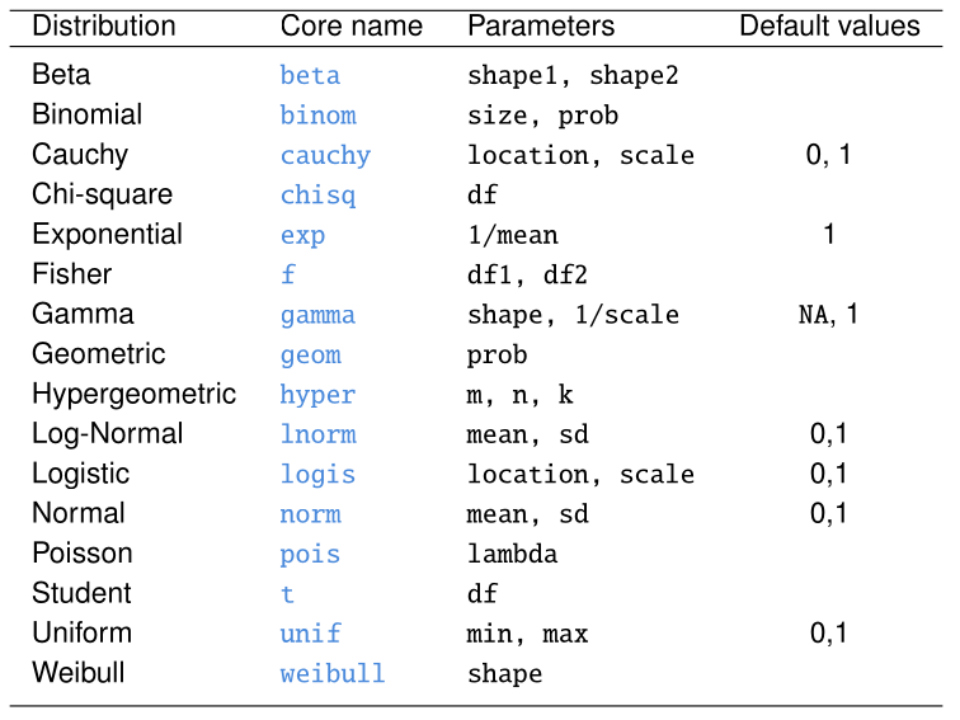

In [8]:
options(repr.plot.width = 8, repr.plot.height = 6)
img <- readPNG("./images/pdf_in_R.png"); grid.raster(img)

---

# 02 - DISCRETE DISTRIBUTIONS

---

## BERNOULLI PROCESS
A Bernoulli process is a random experiment with **only two possible outcomes**: success and failure. If we assign the values $1$ to success and $0$ to failure, then the random variable $ X \in \{0, 1\} $, and:
- Success with probability $ p $: $$ P(X = 1) = p $$
- Failure with probability $ 1 - p $, often denoted as $ q $, where $ q = 1 - p $: $$ P(X = 0) = 1 - p = q $$


The expected value and variance of $X$ are:

$$
E[X] = p
$$

$$
\text{Var}(X) = p(1 - p)
$$

Examples:
* Tossing a coin (e.g., heads = 1, tails = 0)  
* Drawing from a die and checking if the result matches a specific number (e.g., success = rolling a 6)


In [17]:
# example: probability of obatining 6 from a die
p <- 1/6
exp_value <- p; round(exp_value,3)
var <- p*(1-p); round(var, 3)

[1] 0.167

[1] 0.139

---

## BINOMIAL DISTIRBUTION
The **sum of $n$ independent Bernoulli trials** follows a Binomial distribution.  
It give us the probability of obtaining exactly $x$ successes in $n$ independent trials, each with success probability $p$:

$$
B(x| p, n) = \binom{n}{x} p^x (1 - p)^{n - x}
$$

The expected value and variance of a Binomial random variable $X$ are:

$$
E[X] = np
$$

$$
\text{Var}(X) = np(1 - p)
$$

Properties:
* The distribution is symmetric when $p = \frac{1}{2}$
* When $p \ne \frac{1}{2}$, the distribution is skewed
* As $n$ increases, the distribution becomes more symmetric, and for large $n$, it approximates a Gaussian (normal) distribution

Examples:
* Tossing a coin $n$ times and counting the number of heads  
* Throwing multiple dice and counting how many times a certain value appears  
* Drawing $x$ red balls from an urn containing a known proportion of red and white balls (with replacement)

CODE EXAMPLE:  
In a restaurant 8 entrees of fish, 12 of beef and 10 of poultry are served. What is the probability that 2 of the 4 next customers order fish entrees ?

P(2 | np) = 0.229451851851852 


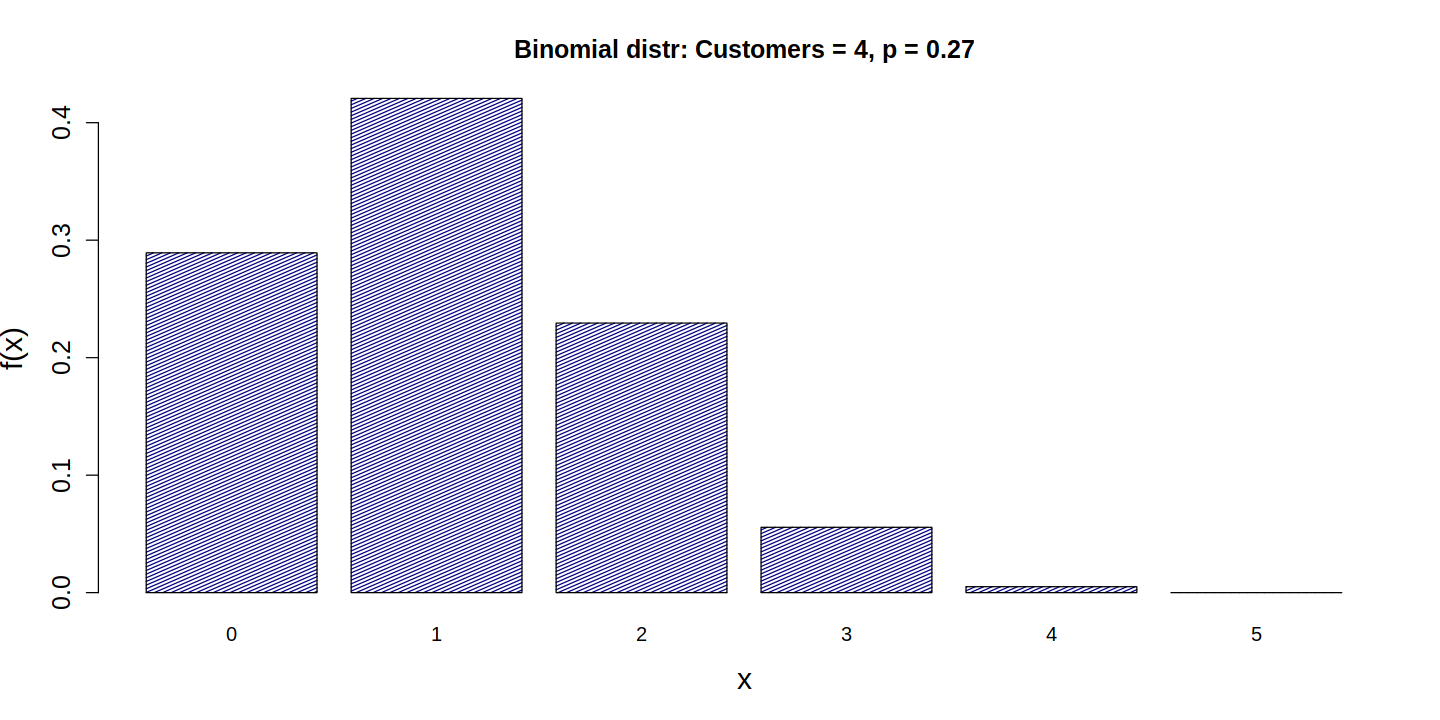

In [35]:
cust <- 4
p <- 8/30
x <- 0:5
ap <- dbinom(x, cust, p)

options(repr.plot.width = 12, repr.plot.height = 6)
barplot( ap,  names.arg = x,   col = "navy",  xlab = "x",  ylab = "f(x)",  density = 40,
  main = sprintf("Binomial distr: Customers = %d, p = %.2f", cust, p),   cex.lab = 1.5,  cex.axis = 1.25, cex.main = 1.25,  cex.sub = 1.5)

cat(paste("P(2 | np) =", ap[3], "\n"))

---

## GEOMETRIC DISTRIBUTION
The geometric distribution gives the number of Bernoulli trials to get the first success. In R we use `dgeom(x,p)`.  
Calling $x$ the number of failures before success (definition used in R), with $x \in {0,1,2..}$, and $p$ the probability of success of a single trial, we have:
$$ Geo(x|p)= p(1-p)^x  $$

Instead if we want to compute $x$ as the number of trials to obtain success, we use $x-1$ in the exponent, with $x \in {1,2,3..}$:
$$ Geo(x|p)= p(1-p)^{x-1}  $$

The expected value and variance are:
$$
E[X] = \frac{1}{p}
$$

$$
\text{Var}(X) = \frac{1-p}{p^2}
$$

Useful results:
$$ P(x ≤ r) = 1 − (1 − p)r = qr $$ 
$$ P(x > r) = 1 − qr $$

In [27]:
# EXAMPLE: COIN TOSS, guessing when I will draw head
p <- 1/2
exp_value <- 1/p; round(exp_value,3)
dev_std <- sqrt( (1-p)/p^2 ); round(dev_std, 3)

[1] 2

[1] 1.41

#### EXAMPLE: The drunk-man and the home keys problem  
A man comes back home pretty drunk, he has 8 keys and tries them randomly to unlock his apartment door. After each trial he loses memory. We watch him and bet on the attempt on which he will succeed $n_{\text{try}} = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, \dots$. On which number should we bet?

We have $p = \frac{1}{8}$.

Then:

$$ f(1) = P(E_1) = p = \frac{1}{8} $$

$$ f(2) = P(E_2 \cap \bar{E}_1) = P(E_2 | \bar{E}_1) \cdot P(\bar{E}_1) = p \cdot (1 - p) $$

$$ f(3) = P(E_3 \cap \bar{E}_2 \cap \bar{E}_1) = P(E_3 | \bar{E}_2 \cap \bar{E}_1 ) \cdot P(\bar{E}_2 | \bar{E}_1)  \cdot P(\bar{E}_1) =  p \cdot (1 - p)^2 $$

$$ f(x) = p \cdot (1 - p)^{x - 1} $$

Our probabilities follow a geometric distribution with $p = \frac{1}{8}$:

$$ f(1) = \frac{1}{8} = 0.125 $$

$$ f(2) = \frac{1}{8} \cdot \frac{7}{8} = 0.109 $$

$$ f(3) = \frac{1}{8} \cdot \left(\frac{7}{8}\right)^2 = 0.096 $$

$$ f(4) = \frac{1}{8} \cdot \left(\frac{7}{8}\right)^3 = 0.084 $$

So the first trial is the most probable.   

Expected number of trials and standard deviation:

$$ E[X] = \frac{1}{p} = 8 $$

$$ \sigma = \sqrt{\frac{1 - p}{p^2}} = \sqrt{\frac{7/8}{(1/8)^2}} = 7.5 $$


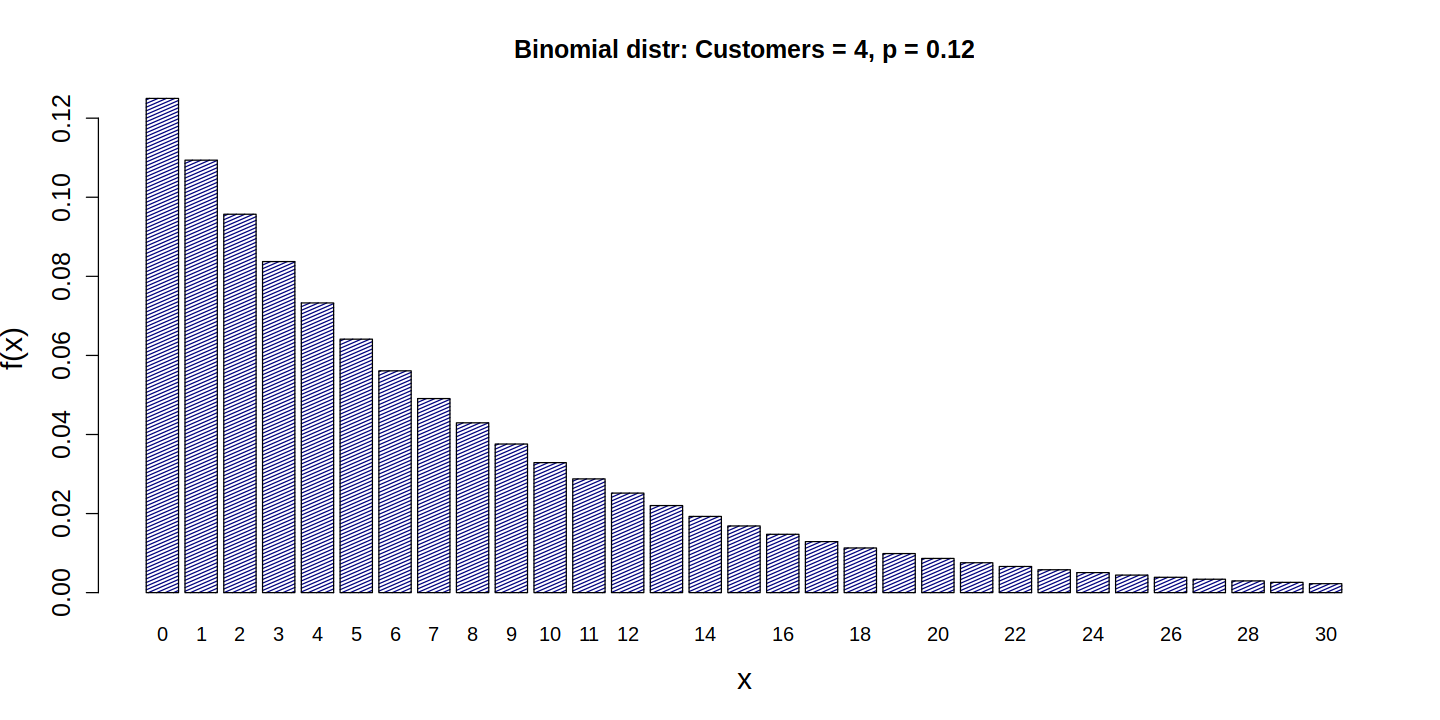

In [36]:
cust <- 4
p <- 1/8
x <- 0:30
ap <- dgeom(x, p)

options(repr.plot.width = 12, repr.plot.height = 6)
barplot( ap,  names.arg = x,   col = "navy",  xlab = "x",  ylab = "f(x)",  density = 40,
  main = sprintf("Binomial distr: Customers = %d, p = %.2f", cust, p),   cex.lab = 1.5,  cex.axis = 1.25, cex.main = 1.25,  cex.sub = 1.5)

---

## MULTINOMIAL DISTRIBUTION

The multinomial distribution is a generalization of the binomial distribution to the case of more than two possible outcomes.  
Let the disjoint outcomes be labeled as $A_1, A_2, \dots, A_r$ with probabilities $P(A_j) = p_j$, where $1 \leq j \leq r$.  
In $n$ independent trials, let $x_j$ denote the number of times outcome $A_j$ occurs, such that $ n = x_1 + x_2 + \dots + x_r $.

The probability mass function is:

$$
P(X_1 = x_1, X_2 = x_2, \dots, X_r = x_r \mid p_1, p_2, \dots, p_r, n) =
\frac{n!}{x_1! x_2! \dots x_r!} p_1^{x_1} p_2^{x_2} \dots p_r^{x_r}
$$

Properties:
$$
\mathbb{E}[x_j] = n p_j
$$

$$
\mathrm{Var}(x_j) = n p_j (1 - p_j)
$$

$$
\mathrm{Cov}(x_i, x_j) = -n p_i p_j
$$

As $n$ becomes large, the multinomial distribution tends toward a multivariate normal distribution.

Note: the marginalization to a single outcome coincides with the binomial distribtuion!

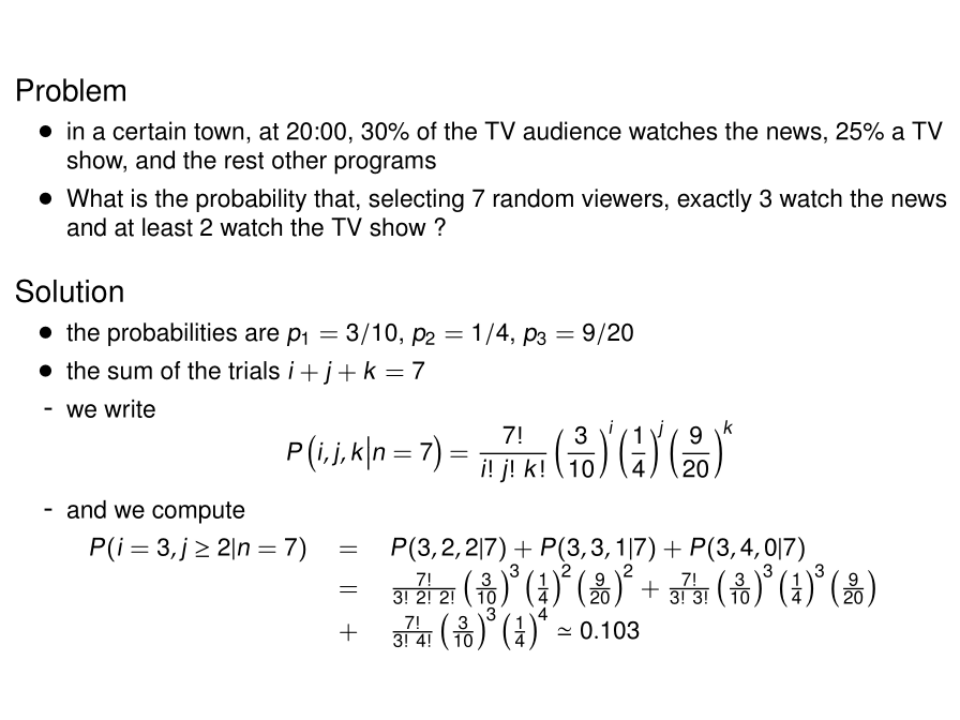

In [40]:
# EXAMPLE:
options(repr.plot.width = 8, repr.plot.height = 6)
img <- readPNG("./images/multinomial_example.png"); grid.raster(img)

---

## POISSON DISTRIBUTION

#### PROCESS INTRODUCTION
The **Poisson Process** is a type of event that might happen over time, with the following assumptions:

- The probability of one count in a small time interval $\Delta t$ is proportional to $\Delta t$: $   P(\text{1 count in } \Delta t) = r \, \Delta t $ where $r$ is the intensity (rate) of the process.
- The probability of two or more events in $\Delta t$ is negligible: $ P(\geq 2 \text{ counts in } \Delta t) \ll P(1 \text{ count}) $. This tells us that the occurrence of two or more events in a small time is practically
impossible.
- Events are independent across disjoint intervals: the probability of n events in [t, t + s] is independent of
how many events have accurred earlier, the process is memoryless.
- Stationarity: given two equal time intervals, ∆t1 and ∆t2 , the probability of n
events in ∆t1 is equal to that in ∆t2


Examples: Accidents occurring at an intersection; Gamma rays emitted from a radioactive source; Customers entering a post office; Earthquakes in Italy.


#### DISTRIBUTION

The **Poisson distribution** (probability mass function in this case) is:

$$ Pois(X=k|\lambda) = \frac{\lambda^k}{k!} e^{-\lambda} $$

where: $\lambda = rT$ is the **expected number of events** in the interval; $k$ is a non-negative integer representing the specific **number of events for which we want to calculate the probability** of occurrence within that interval. We can use this distrib with `dpois(x, lambda)`.

Properties:

$$
\mathbb{E}[X] = \lambda
$$

$$
\mathrm{Var}(X) = \lambda
$$

$$
Pois(X = k) = \frac{\lambda}{k} Pois(X = k - 1)  \quad \quad \text{Recursive identity}
$$

$$
X = X_1 + X_2 + \dots + X_k \sim \text{Poi}(\lambda_1 + \lambda_2 + \dots + \lambda_k) \quad \quad \text{sum of Pois is Pois}
$$

The last equation tells us that the sum of independent Poisson variables is also a Poisson variable with mean value equal to the sum of individual means.  
Asymptotically, for large $\lambda$, the Poisson distribution approximates the normal distribution. The approximation is fairly accurate already at $\lambda \approx 20$.



#### DERIVATION FROM BINOMIAL DISTRIB.

We can derive the Poisson distribution as a limiting case of the Binomial distribution. Taking the limit as $n \to \infty$, $p \to 0$, with $np = \lambda$ held constant, we obtain the Poisson distribution:

  $$
  \lim_{n \to \infty} \text{Bin}(n, p) = \text{Poi}(\lambda)
  $$

---




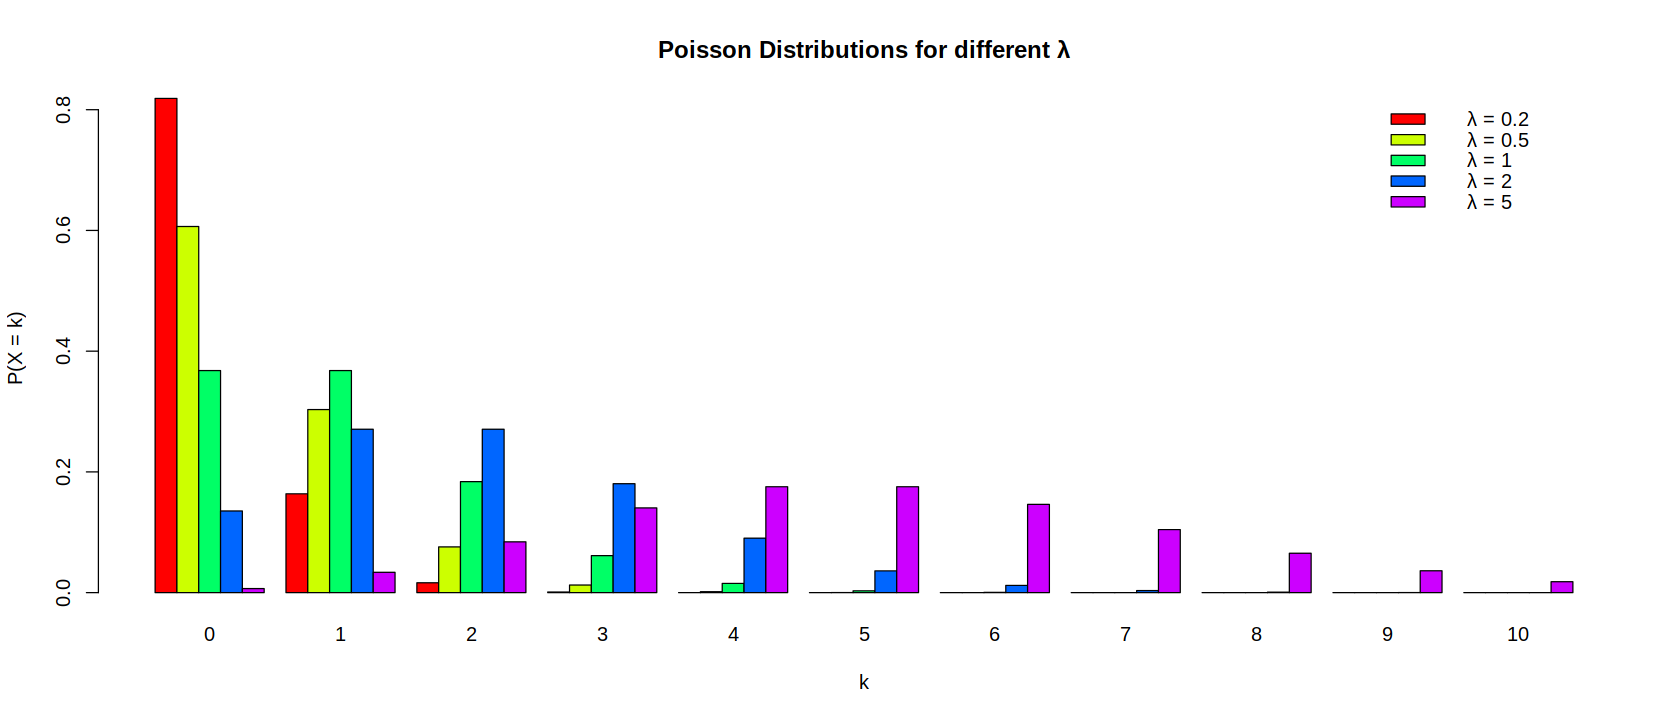

In [18]:
# Lambda values
lam <- c(0.2, 0.5, 1, 2, 5)
x_val <- 0:10

# Compute Poisson probabilities for each lambda
y_mat <- sapply(lam, function(l) dpois(x_val, l))

# Transpose to get each row as a bar group
options(repr.plot.width = 14, repr.plot.height = 6)
barplot(t(y_mat),
        beside = TRUE,
        col = rainbow(length(lam)),
        names.arg = x_val,
        xlab = "k",
        ylab = "P(X = k)",
        main = "Poisson Distributions for different λ",
        legend.text = paste("λ =", lam),
        args.legend = list(x = "topright", bty = "n"))


EXAMPLE:    
A radioactive substance emits on average 3.9 $\alpha$/s per gram. Compute the probability that, in the next second, the number of emitted alpha particles is:
1. at most 6
2. at least 2
3. at least 3 and at most 6

SOLUTION:  
Every gram of element has $n$ atoms. From the information we have, the expected number of events is: $ \mathbb{E}[X] = np = \lambda = 3.9 $
1. Probability that $x \leq 6$:
  $$
  P(x \leq 6) = \sum_{x=0}^{6} \frac{3.9^x}{x!} e^{-3.9}
  $$
2. Probability that $x \geq 2$:
  $$
  P(x \geq 2) = 1 - P(x \leq 1) = 1 - \sum_{x=0}^{1} \frac{3.9^x}{x!} e^{-3.9}
  $$
3. Probability that $3 \leq x \leq 6$:
  $$
  P(3 \leq x \leq 6) = \sum_{x=3}^{6} \frac{3.9^x}{x!} e^{-3.9}
  $$



In [32]:
lam <- 3.9
cat( 'answer 1:', ppois(6,lam) , '\n' )
cat( 'answer 2:', 1-ppois(1,lam) , '\n' )
cat( 'answer 3:', ppois(6,lam) - ppois(2,lam) , '\n' )

answer 1: 0.899483 
answer 2: 0.9008146 
answer 3: 0.6463579 


---

## EXPONENTIAL DISTRIBUTION
The **inter-arrival time of any two consecutive events of a Poisson Process** follows an exponential distribution. Examples are: Time between two customers in a shop; Duration of a phone call; Time between two accidents at an intersection; Time until the next baby is born in a hospital; Time to failure of a chip in a group of fault-free devices.  
The distribution is given by:

$$
Exp(t) =
\begin{cases}
\lambda e^{-\lambda t} & t \geq 0 \\
0 & t < 0
\end{cases}
$$
where $\lambda$ is the poisson rate and $t$ the time.  

The CDF is given by:
$$
F(t) =
\begin{cases}
1 - e^{-\lambda t} & t \geq 0 \\
0 & t < 0
\end{cases}
$$

Properties:
$$
\mathbb{E}[X] = \frac{1}{\lambda}, \quad \text{Var}(X) = \frac{1}{\lambda^2}
$$


EXAMPLE:  
Suppose that every three months, an earthquake of some entity happens in Italy. What is the probability that the next earthquake happens after three but before seven months?

Calling $X$ the time in month until the next earthquake, it will follow an exponential distribution with $\lambda=1/3$ (prob of having an earthquake in a single month, i.e. our time interval):
$$ P(3 < X < 7) = F(7) − F(3) = (1 − e^{7/3}) − (1 − e^{3/3}) $$

In [31]:
lambda <- 1/3
cat( 'answer:', pexp(7,lambda ) - pexp(3,lambda ) , '\n' )

answer: 0.2709075 


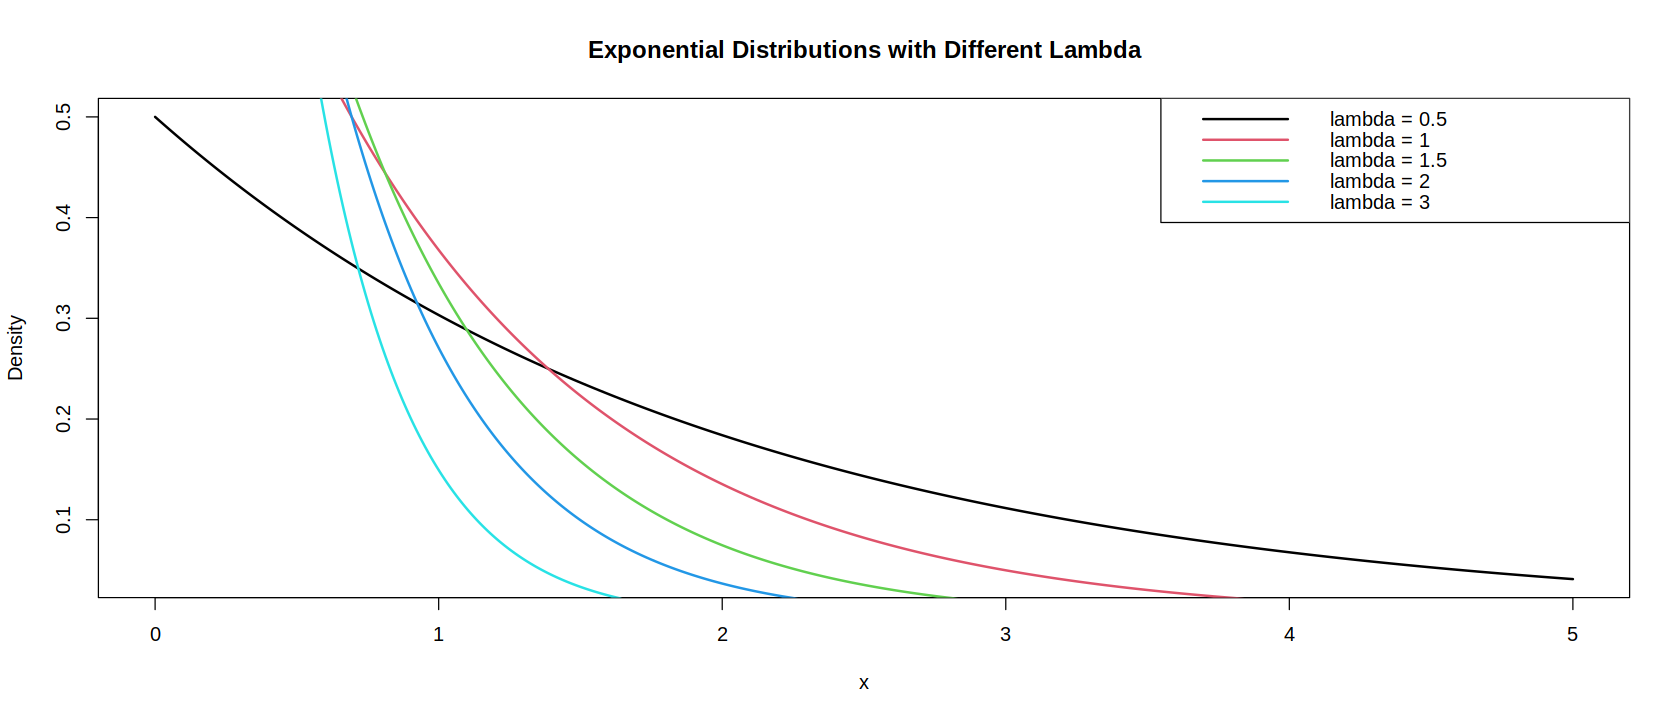

In [41]:
# Define lambda values
lambdas <- c(0.5, 1, 1.5, 2, 3)

# Define a sequence of x values
x_vals <- seq(0, 5, length.out = 500)

# Set up the plot
plot(x_vals, dexp(x_vals, rate = lambdas[1]), type = "l", col = 1,
     ylab = "Density", xlab = "x", lwd = 2,
     main = "Exponential Distributions with Different Lambda")

# Add lines for the other lambda values
for (i in 2:length(lambdas)) {
  lines(x_vals, dexp(x_vals, rate = lambdas[i]), col = i, lwd = 2)
}

# Add a legend
legend("topright", legend = paste("lambda =", lambdas),
       col = 1:length(lambdas), lwd = 2)



---

## ANALOGY BETWEEN EXPONENTIAL AND GEOMETRIC
1. Geometric distribution $Geo()$ models the number of trials until the first success in a series of independent Bernoulli trials. Also the number of trials between two **consecutive** events follows $Geo()$.
2. Exponential distribution $Exp()$ models the time until the first event in a Poisson process (a continuous-time process with independent events occurring at a constant rate). And also the time between two **consecutive** events follows $Exp()$.
3. Both distributions are the only memory-less distributions (respectively for discrete and continuous case), meaning the probability of success or event occurrence in the future is independent of the past.

---

## SUMMARY OF DISCRETE PMF

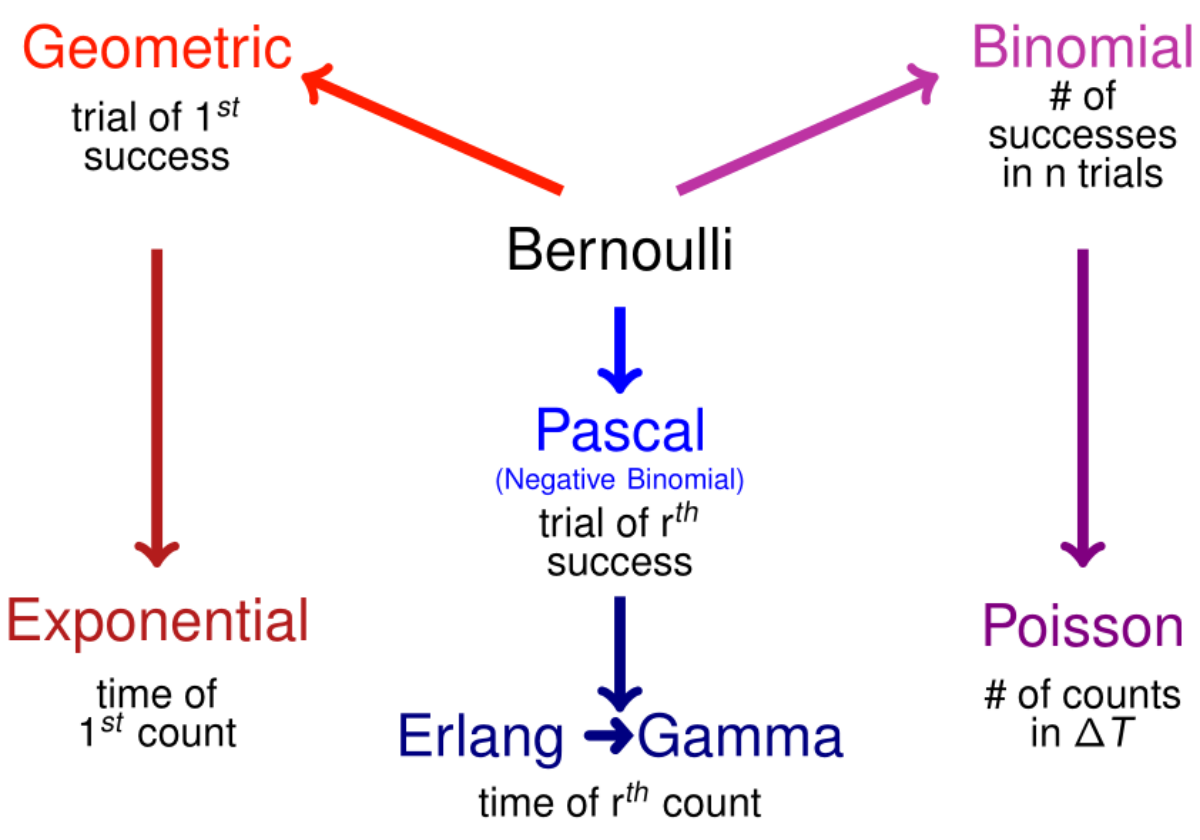

In [44]:
options(repr.plot.width = 10, repr.plot.height = 7)
img <- readPNG("./images/pmf_summary.png"); grid.raster(img)

---

# 03 - CONTINUOUS DISTRIBUTIONS
Some discrete distributions can be easily transfered also to the continuous cas, like exponential, poisson..

---

## UNIFORM DISTRIBUTION
A random variable $X \sim U(a, b)$ follows a uniform distribution if his every value is equally probable. Its probability density function (PDF) is given by:

$$
f(X) = 
\begin{cases}
\frac{1}{b - a} & \text{for } a \leq x \leq b \\
0 & \text{otherwise}
\end{cases}
$$

The CDF is:

$$
F(X) = 
\begin{cases}
0 & \text{for } x < a \\
\frac{x - a}{b - a} & \text{for } a \leq x \leq b \\
1 & \text{for } x > b
\end{cases}
$$

Properties:

$$
E[X] = \frac{a + b}{2},
\quad
\text{Var}(X) = \frac{(b - a)^2}{12}
$$


---

## GAMMA DISTRIBUTION
While the exponential distribution models the time to wait for the first Poisson event to occur (or between two consecutive events), the Gamma Distribution models the **time to wait for the $\alpha$-th event** to occur (or between two non-consecutive events).

A random variable $x$ follows a Gamma distribution, $x \sim \text{Gamma}(\alpha, \lambda)$, if its probability density function (pdf) has the form:

$$ Gamma(x|\alpha, \lambda) = \frac{1}{\Gamma(\alpha)} \lambda^\alpha x^{\alpha - 1} e^{-\lambda x}, \quad x \geq 0 $$

Where $\alpha > 0$ and $\lambda > 0$ are the shape and scale parameters, respectively. $\alpha$ is the number of events you are waiting for, instead $\lambda$ controls how quickly events happen: Higher λ → faster events → the distribution shifts left; Lower λ → slower events → the distribution shifts right. The mean waiting time for one event is $1/\lambda$, just like in the exponential.  
The Gamma function, $\Gamma : (0, \infty) \to \mathbb{R}$, is defined as:

$$ \Gamma(\alpha) = \int_0^{\infty} x^{\alpha-1} e^{-x} \, dx $$

$$ \text{property:} \quad n! = n \cdot (n-1)! \quad \Rightarrow \quad \Gamma(\alpha) = (\alpha - 1) \cdot \Gamma(\alpha - 1), \quad \text{for} \quad \alpha > 1 $$

Mean and variance:
$$
E[X] = \frac{\alpha}{\lambda},
\quad
\text{Var}(X) = \frac{\alpha}{\lambda^2}
$$

Some properties of the gamma distrib:
- If $X \sim \text{Gamma}(\alpha, 1)$, then $\frac{X}{\lambda} \sim \text{Gamma}(\alpha, \lambda)$
- It includes the Exponential distribution as a special case (when $\alpha = 1$)
- The Gamma distribution can be very skewed or almost bell-shaped depending on the values of $\alpha$ and $\lambda$
- It is the distribution of the sum of a number of independent exponential random variables
- The CDF of the Gamma distribution does not have an explicit form. Therefore, the **inverse transform method** cannot be used for generating variates from a Gamma distribution.
- In Bayesian analysis, the Gamma distribution is a natural conjugate prior for the standard deviation of a normal distribution.

Shape behaviour:
- If $\lambda$ is fixed: The peak of the distribution moves to the right as $\alpha$ increases.
- If $\alpha$ is fixed: The peak of the distribution shifts to the left as $\lambda$ increases.


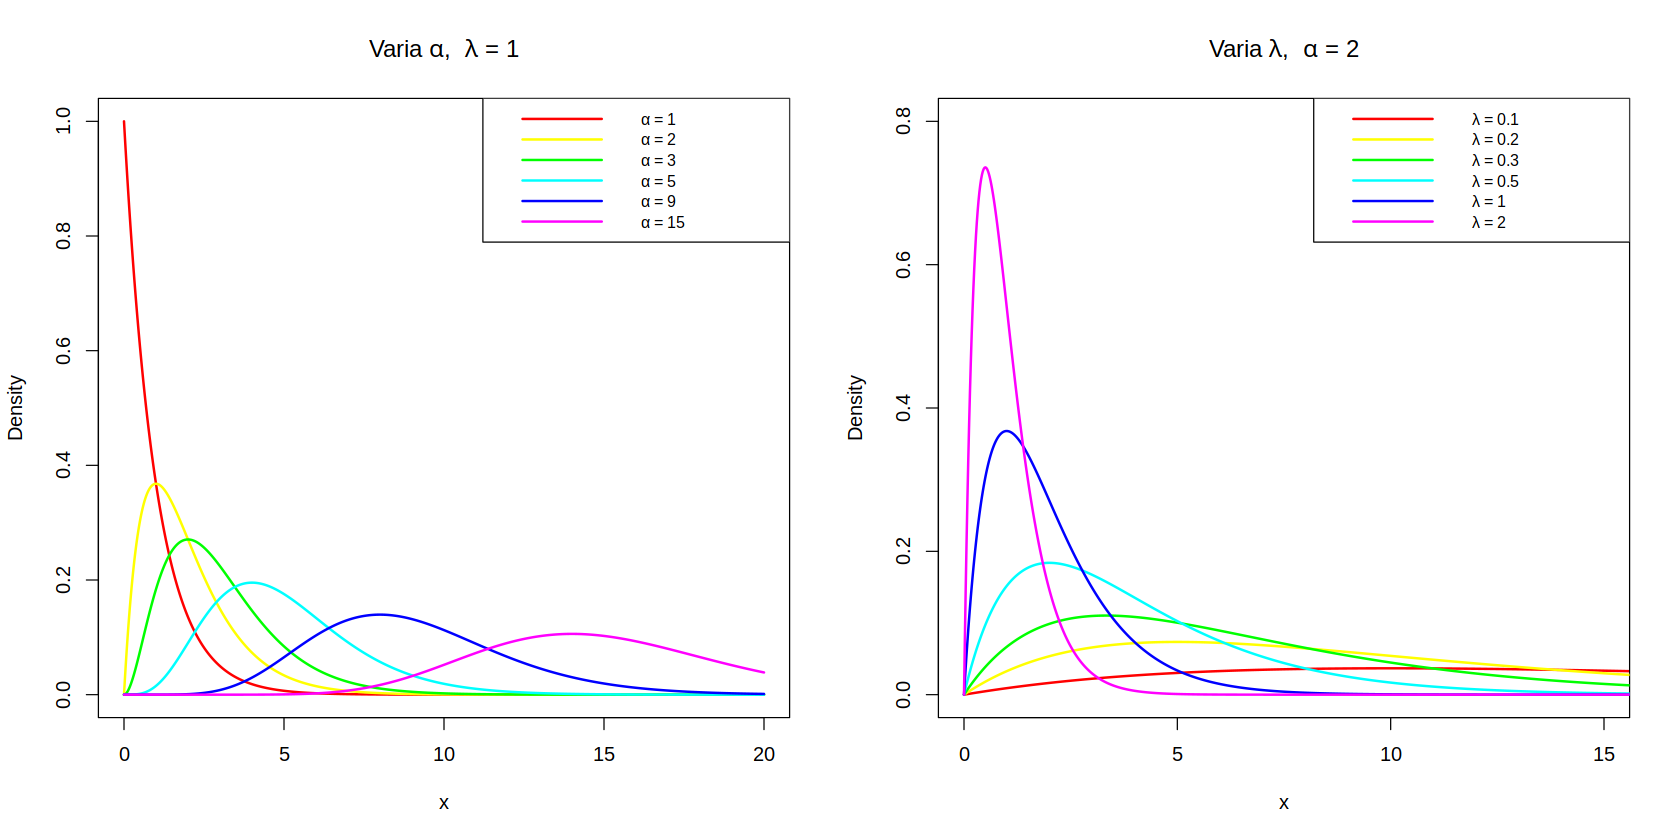

In [12]:
options(repr.plot.width = 14, repr.plot.height = 7)

# Preparazione
x <- seq(0, 20, length.out = 1000)
colors <- rainbow(6)

# Imposta layout: 1 riga, 2 colonne
par(mfrow = c(1, 2))

# Primo grafico: cambia α (shape), fissa λ (rate)
lambda_fixed <- 1
alpha_values <- c(1, 2, 3, 5, 9, 15)

plot(x, dgamma(x, shape = alpha_values[1], rate = lambda_fixed),
     type = "l", col = colors[1], lwd = 2,
     ylim = c(0, 1), xlab = "x", ylab = "Density",
     main = expression(paste("Varia ", alpha, ",  ", lambda, " = 1")))

for (i in 2:length(alpha_values)) {
  lines(x, dgamma(x, shape = alpha_values[i], rate = lambda_fixed),
        col = colors[i], lwd = 2)
}

legend("topright", legend = paste("α =", alpha_values),
       col = colors, lwd = 2, cex = 0.8)

# Secondo grafico: cambia λ (rate), fissa α (shape)
alpha_fixed <- 2
lambda_values <- c(0.1, 0.2, 0.3, 0.5, 1, 2)

plot(x, dgamma(x, shape = alpha_fixed, rate = lambda_values[1]),
     type = "l", col = colors[1], lwd = 2,
     xlim = c(0,15),
     ylim = c(0, 0.8), xlab = "x", ylab = "Density",
     main = expression(paste("Varia ", lambda, ",  ", alpha, " = 2")))

for (i in 2:length(lambda_values)) {
  lines(x, dgamma(x, shape = alpha_fixed, rate = lambda_values[i]),
        col = colors[i], lwd = 2)
}

legend("topright", legend = paste("λ =", lambda_values),
       col = colors, lwd = 2, cex = 0.8)


## BETA DISTRIBUTION
A random variable $X$ follows a Beta distribution, written as $X \sim \text{Beta}(\alpha, \beta)$, if the PDF is:

$$
Beta(x) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \cdot \Gamma(\beta)} \, x^{\alpha - 1} (1 - x)^{\beta - 1}, \quad \text{for } 0 \le x \le 1, \; \alpha, \beta > 0
$$

Where
1. $\alpha$ – controls how much the distribution leans toward 1. Think of it as "prior successes" (in a Bayesian context).
2. $\beta$ – controls how much the distribution leans toward 0. Think of it as "prior failures".

Beta distribution **appears in the study of the median of a sample of random points** $X_j \sim \mathcal{U}(0, 1)$.  
Let $X_1 < X_2 < \dots < X_n$ be $n$ sorted values sampled from $\text{Beta}(\alpha, \beta)$.

  - If $n = 2k + 1$ (odd), then the median is $X_{k+1}$
  - If $n = 2k$ (even), then the median is $\frac{X_k + X_{k+1}}{2}$

The median of $2n + 1$ random numbers from $\mathcal{U}(0,1)$ is distributed as $ \text{Beta}(n+1, n+1) $.

Moments:  
$$
\mathbb{E}[X] = \frac{\alpha}{\alpha + \beta}
\quad \quad \quad \quad
\text{Var}(X) = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}
$$
$$
\text{n-th moment:}
\quad
\mathbb{E}[X^n] = \frac{\Gamma(\alpha + n)\Gamma(\alpha + \beta)}{\Gamma(\alpha + \beta + n)\Gamma(\alpha)}
$$
$$
\text{Mode: } = \frac{\alpha -1 }{\alpha + \beta - 2} \quad \text{if $\alpha$, $\beta$ > 1}
$$


Shape:
- Increasing: $\alpha > 1$, $\beta < 1$
- Decreasing: $\alpha < 1$, $\beta > 1$
- Symmetric unimodal: $\alpha = \beta$
- Asymmetric unimodal: $\alpha \ne \beta$
- U-shaped: $\alpha < 1$, $\beta < 1$
- Bell shaped: $\alpha > 1$, $\beta > 1$
- The Beta distribution cannot be bimodal (i.e., cannot have two local maxima on $[0, 1]$). In some cases we have to model a random variable that exhibit two modes, for some physical reason. This can be done by mixing two beta distributions.
- The ratio $\alpha/\beta$ controls skewness
- The sum $\alpha+\beta$ controls concentration: Larger values → more concentrated near the mean; Smaller values → more spread out or even U-shaped.

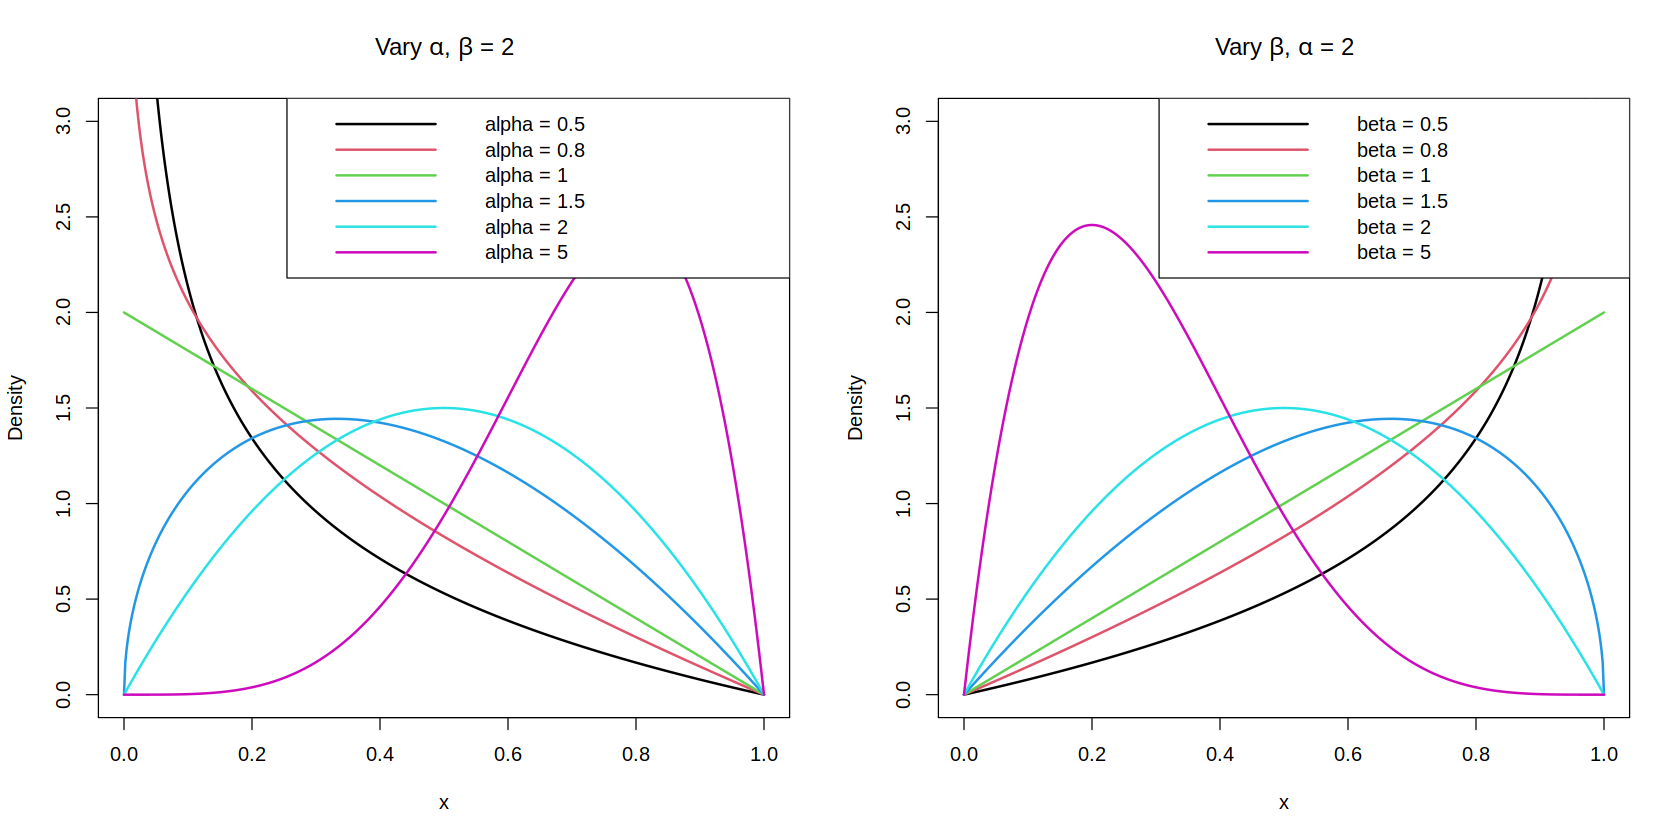

In [20]:
options(repr.plot.width = 14, repr.plot.height = 7)

# Define x values
x <- seq(0, 1, length.out = 500)

# Set up side-by-side plots
par(mfrow = c(1, 2))

# First plot: vary alpha, fix beta = 2
alphas <- c(0.5, 0.8, 1, 1.5,  2, 5)
beta_fixed <- 2

plot(x, dbeta(x, alphas[1], beta_fixed), type = "l", lwd = 2,
     ylim = c(0, 3), col = 1, main = expression(paste("Vary ", alpha, ", ", beta, " = 2")),
     xlab = "x", ylab = "Density")

for (i in 2:length(alphas)) {
  lines(x, dbeta(x, alphas[i], beta_fixed), col = i, lwd = 2)
}
legend("topright", legend = paste0("alpha = ", alphas), col = 1:length(alphas), lwd = 2)

# Second plot: vary beta, fix alpha = 2
betas <- c(0.5, 0.8, 1, 1.5,  2, 5)
alpha_fixed <- 2

plot(x, dbeta(x, alpha_fixed, betas[1]), type = "l", lwd = 2,
     ylim = c(0, 3), col = 1, main = expression(paste("Vary ", beta, ", ", alpha, " = 2")),
     xlab = "x", ylab = "Density")

for (i in 2:length(betas)) {
  lines(x, dbeta(x, alpha_fixed, betas[i]), col = i, lwd = 2)
}
legend("topright", legend = paste0("beta = ", betas), col = 1:length(betas), lwd = 2)


---

## NORMAL (GAUSSIAN) DISTRIBUTION
A random variable $X$ follows a normal distribution, $X \sim N(\mu, \sigma^2)$, if the pdf is:

$$
Norm(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

where $\mu$ can be any real number and $\sigma > 0$. If $\mu = 0$ and $\sigma = 1$, it is called a standard normal distribution: $X \sim N(0, 1)$.

Mean and variance:
$$E[X] = \mu \quad \quad \text{Var}(X) = \sigma^2$$

The standard normal distribution is symmetric and unimodal about the mean, $\mu$.  
Keeping $\sigma^2$ fixed, and changing $\mu$, the normal distribution only gets shifted to a new center.  
Maintaining $\mu$ fixed and increasing $\sigma^2$, the distribution becomes more spread out about the same mean value.

#### SUM OF NORMAL DISTRIBUTED VARIABLES
Let $X_1, X_2, \dots, X_n$ be independent random variables where $X_j \sim N(\mu_j, \sigma_j^2)$.  
We define $Y_n$ as the sum: $ Y_n = \sum_{j=1}^{n} X_j $. It can be proved that the $Y_n$ follows a gaussian distribution as:

$$ Y_n \sim \text{Norm} \left( \sum_{j=1}^{n} \mu_j, \sum_{j=1}^{n} \sigma_j^2 \right) $$

#### AVERAGE OF NORMAL DISTRIBUTED VARIABLES
Given $n$ random variables, all following the same $N(\mu, \sigma^2)$ distribution, we have:

$$ \frac{1}{n} \sum_{j=1}^{n} X_j \sim \text{Norm} \left( \mu, \frac{\sigma^2}{n} \right) $$

This means that the distribution of $X$ gets more concentrated around the mean value $\mu$ as $n$ increases, because the variance $\sigma^2$ decreases with $n$.


Any linear combination of independent normal variables is also normal.

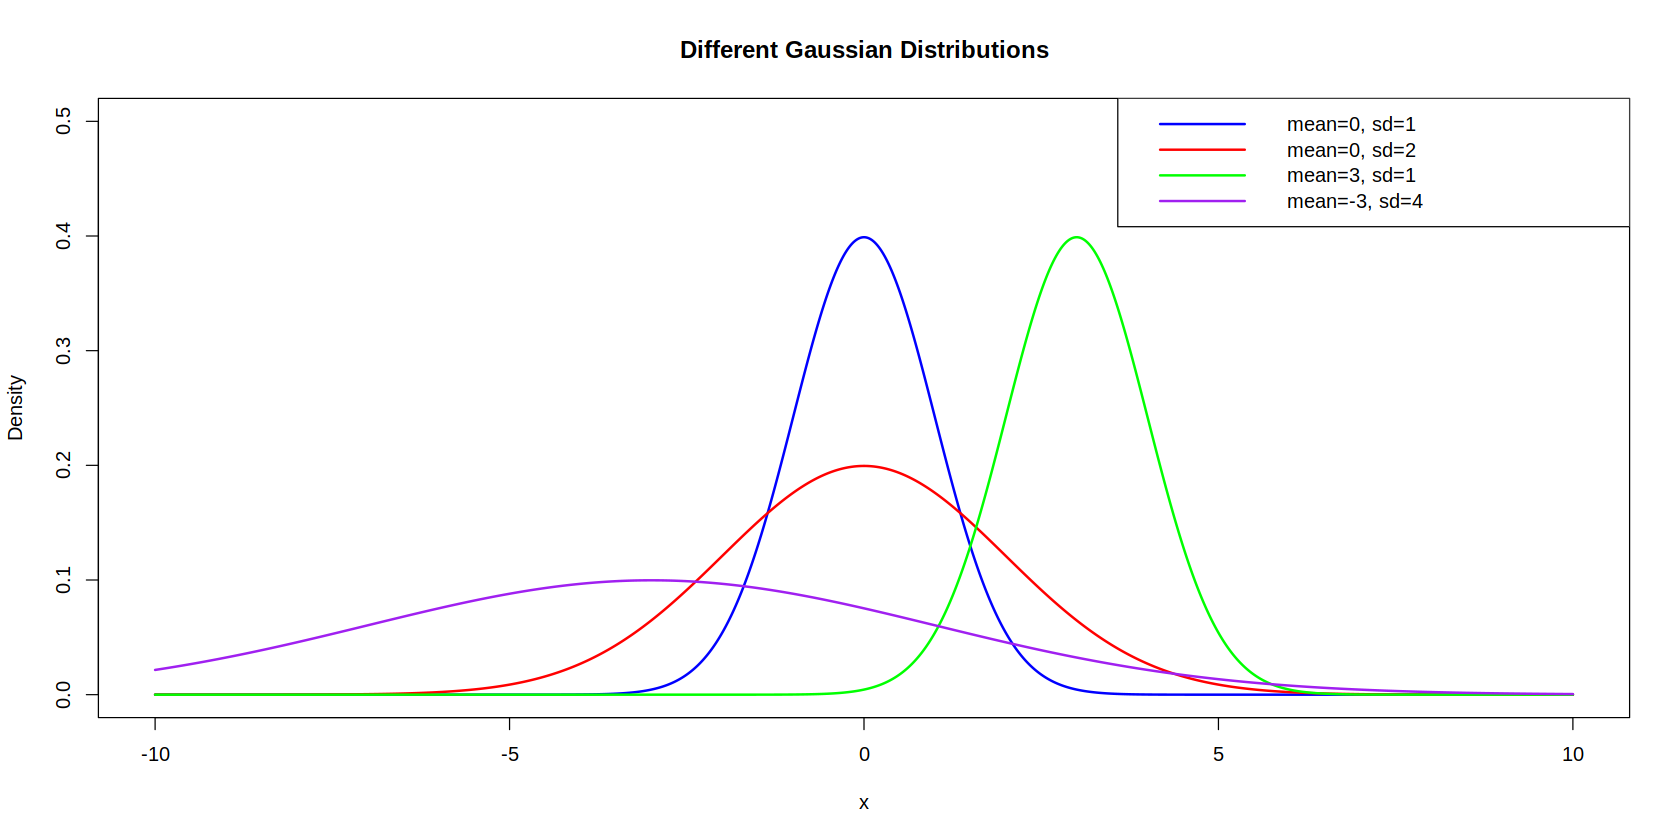

In [24]:
options(repr.plot.width = 14, repr.plot.height = 7)

# Define a function to plot normal distributions with different parameters
plot_gaussians <- function() {
  # Create a sequence of x values
  x <- seq(-10, 10, length.out = 1000)
  
  # Plot the first Gaussian (mean = 0, sd = 1)
  plot(x, dnorm(x, mean = 0, sd = 1), type = "l", col = "blue", lwd = 2,
       main = "Different Gaussian Distributions", xlab = "x", ylab = "Density", 
       xlim = c(-10, 10), ylim = c(0, 0.5))
  
  # Add other Gaussian curves with different means and standard deviations
  lines(x, dnorm(x, mean = 0, sd = 2), col = "red", lwd = 2)
  lines(x, dnorm(x, mean = 3, sd = 1), col = "green", lwd = 2)
  lines(x, dnorm(x, mean = -3, sd = 4), col = "purple", lwd = 2)
  
  # Add a legend
  legend("topright", legend = c("mean=0, sd=1", "mean=0, sd=2", "mean=3, sd=1", "mean=-3, sd=4"), 
         col = c("blue", "red", "green", "purple"), lty = 1, lwd = 2)
}

# Call the function to plot the Gaussians
plot_gaussians()


## LIMIT THEOREMS
Let $X_1, X_2, \dots, X_n$ be independent random variables drawn from the same distribution, each with mean $\mu$ and variance $\sigma^2$.  
We define $S_n = \sum_{j=1}^{n} X_j$.  
Since $X_j$ are independent and identically distributed:
  - $E[S_n] = nE[X_j] = n\mu$
  - $\text{Var}(S_n) = n\text{Var}(X_j) = n\sigma^2$
  
The following theorems apply:

#### STRONG LAW OF LARGE NUMBERS
$$
\lim_{n \to \infty} \frac{S_n}{n} = \mu \quad \text{(with probability 1)}
$$
This theorem tells us that as we increase the number of samples, the average of the $X_j$'s converges to the true mean $\mu$ almost surely.

#### CENTRAL LIMIT THEOREM (CLT)
$$
\lim_{n \to \infty} P \left( \frac{S_n - n\mu}{\sqrt{n}\sigma} \leq x \right) = \Phi(x)
$$
Here, $\Phi(x)$ is the CDF of the standard normal distribution.

The Central Limit Theorem says that, as $n$ increases, the distribution of the normalized sum (i.e., the sum of $X_j$'s shifted by $n\mu$ and scaled by $\sqrt{n}\sigma$) converges to the standard normal distribution. 

---

# 04 - INEQUALITIES
We will discuss three important inequalities. These inequalities are especially useful in **situations where we don't know the full distribution** of a random variable — that is, we don't know the exact shape or form of its probability distribution.

However, if we do know some basic information, such as the expected value (mean) and/or the variance, we can still make meaningful statements about the probabilities of certain events.

These inequalities help us **derive bounds** (upper or lower limits) on probabilities using only that limited information.

## MARKOV'S INEQUALITY
Let $X$ be a non-negative random variable with a finite expected value $\mathbb{E}[X]$.  
Then, for any $a > 0$, the following inequality holds:

$$
\mathbb{P}(X \geq a) \leq \frac{\mathbb{E}[X]}{a}
$$


Markov’s inequality gives an upper bound on the probability that a non-negative random variable exceeds a certain value.  
It is useful when we do not know the full distribution, but do know the expected value.

EXAMPLE:  
Let $\mathbb{E}[X] = 10$. What can we say about the probability that $X \geq 50$?

$$
\mathbb{P}(X \geq 50) \leq \frac{10}{50} = 0.2
$$

So, even without knowing the distribution of $X$, we can say that the chance of $X$ exceeding 50 is at most 20%.


---

## JENSEN'S INEQUALITY
Let $X$ be a random variable with finite mean, and let $\varphi$ be a convex function (i.e. positive second derivative).  
Then Jensen’s inequality states:

$$
\varphi\left( \mathbb{E}[X] \right) \leq \mathbb{E}\left[ \varphi(X) \right]
$$

If $\varphi$ is concave, the inequality is reversed:

$$
\varphi\left( \mathbb{E}[X] \right) \geq \mathbb{E}\left[ \varphi(X) \right]
$$


Jensen’s inequality connects the **expectation of a function** of a random variable to the **function of the expectation**.  
It’s particularly useful in probability, statistics, and information theory.

- For convex functions (e.g., $\varphi(x) = x^2$, $\varphi(x) = e^x$), the "function of the mean" is less than or equal to the "mean of the function".
- For concave functions (e.g., $\log x$, $\sqrt{x}$), the "function of the mean" is greater than or equal to the "mean of the function".

We could say that **a convex function amplifies deviations from the mean**. This means that when you apply a convex function to values away from the mean, it increases their influence more than if you just applied the function to the mean itself.

EXAMPLE:  
Let $X$ be a random variable such that $\mathbb{E}[X] = 2$, and let $\varphi(x) = x^2$, which is convex.

Then: $  \varphi\left( \mathbb{E}[X] \right) =\left( \mathbb{E}[X] \right)^2 = 2^2 = 4 $ and by Jensen’s inequality:

$$
4 = \varphi\left( \mathbb{E}[X] \right) \leq \mathbb{E}[X^2]
$$

This tells us: $\mathbb{E}[X^2] \geq 4$


---

## CHEBYSHEV'S INEQUALITY
Let $X$ be a random variable with finite expected value $\mathbb{E}[X] = \mu$ and finite variance $\mathrm{Var}(X) = \sigma^2$.

Then, for any $k > 0$:

$$
\mathbb{P}(|X - \mu| \geq k\sigma) \leq \frac{1}{k^2}
$$

Sometimes it's written in terms of general $\varepsilon > 0$:

$$
\mathbb{P}(|X - \mu| \geq \varepsilon) \leq \frac{\sigma^2}{\varepsilon^2}
$$

Chebyshev’s inequality gives an **upper bound** on the probability that a random variable deviates from its mean by more than $k$ standard deviations ($\sigma$).  
It works regardless of the distribution of $X$ — no assumptions of normality or symmetry are needed. In other words it gives insight into how "concentrated" the distribution is around the mean.


EXAMPLES:  
Let $\mu = \mathbb{E}[X]$ and $\sigma^2 = \mathrm{Var}(X)$.  
Then::

$$ \mathbb{P}(|X - \mu| \geq 2\sigma) \leq \frac{1}{4} = 0.25 \quad \text{for} \quad k=2 $$
$$ \mathbb{P}(|X - \mu| \geq 4\sigma) \leq \frac{1}{16} = 0.06 \quad \text{for} \quad k=4 $$
$$ \mathbb{P}(|X - \mu| \geq 10\sigma) \leq \frac{1}{100} = 0.01 \quad \text{for} \quad k=10 $$

This means for example that no more than 25% of the values lie more than 2 standard deviations away from the mean — for any distribution.

---

# 05 - BAYESIAN INFERENCE

## BAYES THEOREM, PRIOR AND POSTERIOR
Bayes’ theorem gives a mathematical rule for inverting conditional probabilities, allowing one to find the probability of a cause given its effect. Its general equation states:

$$ P(A|B)= \frac{P(B|A) \cdot P(A) }{ P(B) } $$

But a more detailed version is:

$$ P(H_j \mid E_k) = \frac{P(E_k \mid H_j) \cdot P(H_j)}{ \sum_j P(E_k\mid H_j) \cdot P(H_j) } $$



Where:

- $H_j$ is the $j$-th hypothesis.
- $E_k$ is the observed evidence (or data).

We can then identify the terms as:
- $P(H_j)$ is the **prior probability**: our belief in the hypothesis *before* seeing the data.
- $P(H_j \mid E_k)$ is the **posterior probability**: our updated belief in the hypothesis *after* observing the data.
- $P(E_k\mid H_j)$ is the **likelihood**: the probability of observing the data $E_k$ assuming $H_j$ is true. It is orften assumed as a gaussian pdf
- $P(E_k) $ serves as a **normalizing constant** to make sure the posterior is a proper probability distribution. It is called **evidence** or marginal likelihood: the total probability of the evidence under all possible hypotheses.

Bayes' theorem allows us to perform rational inference: instead of relying only on intuition, we formally update our beliefs using probability theory and observed evidence. This is the core idea behind Bayesian statistics, Bayesian machine learning, and Bayesian inference in general.  
In this way the Bayes theorem can be rewrite as **'We update the Prior using the Likelihood to obtain the Posterior'**:
$$ \text{Posterior} \propto \text{Likelihood} \cdot \text{Prior} $$

Sometimes the denominator is hard to compute, or we are only interested in how the posterior changes across different hypotheses. In any case it is useful only as a normalization factor. It can be found with (where $\theta$ are parameters of the model):
$$
P(E_k) = \int P(E_k \mid \theta) \cdot P(\theta) \, \text{d}\theta 
\quad \quad \text{or} \quad \quad
P(E_k) = \sum_j P(E_k\mid H_j) \cdot P(H_j)
$$


## BAYESIAN MODEL COMPARISON
Given a set of models $\{H_j\}$, we want to find out which one is best supported by data. This means finding $P(H_j|D)$, the model **posterior** probability.

#### CASE: ONE MODEL WITHOUT PARAMETERS
We start by looking at model comparison for the simple case of models with no parameters. We look for the posterior $P(H|D)$, i.e. the posterior probability of the whole model $H$ given the data $D$.


With some math, we can write:
$$ P(H \mid D) = \frac{1}{1 + \frac{1}{R}} $$

where $R$ is the **posterior odd ratio**, that tells us how our belief in $H$ changes after seeing the data:
$$ R = \frac{P(H \mid D)}{P(\bar{H} \mid D)} = \frac{P(D \mid H) P(H)}{P(D \mid \bar{H}) P(\bar{H})} $$

Here $P(D \mid H)$ is the probability of measuring $D$ when $H$ is true, $P(D \mid \bar{H})$ the probability of measuring $D$ when $H$ is false, $P(H)$ the prior probability that $H$ is true (and of course, $P(\bar{H}) = 1 - P(H)$).

If we have no reason to prefer $H$ over $\bar{H}$, we can set: $ P(H) = P(\bar{H}) $. In this case $R$ becomes the **Bayes factor**, i.e. the ratio of the probability of the data under each model, taht tells us how strongly the data favors one model over another:
$$ \text{BF} = \frac{P(D \mid H)}{P(D \mid \bar{H})} $$

#### CASE: MULTIPLE MODELS WITHOUT PARAMETERS
Suppose we have more models, $\{ H_j \}$, with $\sum_j P(H_j) = 1$. Then the probability of the data becomes:
$$ P(D) = \sum_j P(D \mid H_j) P(H_j) $$

The posterior probability of model #1, $H_1$, becomes:
$$ P(H_1 \mid D) = \frac{P(D \mid H_1) P(H_1)}{P(D)} $$

If we do not have a complete set of models, we cannot compute full posterior probabilities, but we can still compute the odds ratio or Bayes factor between any two models:

$$ \text{BF} = \frac{P(D \mid H_1)}{P(D \mid H_2)}
\quad \text{and} \quad
R = \frac{P(D \mid H_1) P(H_1)}{P(D \mid H_2) P(H_2)}
$$

EXAMPLE:   
We define the following propositions: $D$: a person tests positive; $H$: a person has the disease.   
A test for a disease is 90% reliable, i.e. $P(D \mid H) = 0.9$.    
The probability of testing positive in absence of the disease is 0.07, i.e. $P(D \mid \bar{H}) = 0.07$.  
Among people aged 40 to 50 with no symptoms, 8 in 1000 have the disease, so $P(H) = 0.008$.  
    
    Question: If a person in their 40s tests positive, what is the probability that they have the disease?
    
    Answer: we compute the posterior odds ratio $R$:

$$
R = \frac{P(D \mid H) \cdot P(H)}{P(D \mid \bar{H}) \cdot P(\bar{H})}
= \frac{0.9 \cdot 0.008}{0.07 \cdot (1 - 0.008)}
= \frac{7.2 \cdot 10^{-3}}{6.944 \cdot 10^{-2}} \approx 0.1037
$$

    Then the posterior probability is:

$$
P(H \mid D) = \frac{R}{1 + R} = \frac{1}{1 + \frac{1}{R}} \approx 0.094
$$

    Interpretation: Even though a positive test result is quite likely **if** the person has the disease, the probability that the person actually has the disease, given a positive test, is still low. This is because the false positive rate and the low base rate (prevalence) of the disease heavily influence the result.


## PARAMETERS BEST ESTIMATES AND RELIABILITY
Once the posterior is determined, we wish to summarize our inference on a parameter with two numbers: the **best estimat and a measure of its reliability**. The posterior is a probability distribution associated with the parameter, which expresses how much we believe the true value lies near a particular point.

The **best estimate** corresponds to the maximum of the posterior probability density function:
$$\theta_{best} = \arg\max P(\theta \mid D)$$

To assess the reliability of our best estimate, we look at the spread of the posterior around $\theta_{best}$. For this, we consider a Taylor expansion of the posterior pdf around $\theta_{best}$, but instead of the pdf itself, we work with its natural logarithm (which is a monotone function):

$$L(\theta) = \ln P(\theta \mid D) 
\quad \quad  \quad \text{and expanding:} \quad \quad \quad 
L(\theta) = L(\theta_{best}) + \frac{1}{2} \left. \left( \frac{d^2L}{d\theta^2}\right|\right)_{\theta_{best}} (\theta - \theta_{best})^2 + \dots
$$

If we ignore higher-order terms and exponentiate the expansion, we get: $P(\theta \mid D) \approx A \exp\left( -\frac{1}{2} \left.\frac{d^2L}{d\theta^2}\right|_{\theta_{best}} (\theta - \theta_{best})^2 \right)$ where $A$ is a normalization constant. This is the form of a Gaussian distribution! Comparing the exponents, we get: $\left.  \frac{d^2L}{d\theta^2}\right|_{\theta^\circ} = -\frac{1}{\sigma^2}$ which gives us the **reliability**:

$$\sigma = \left( -\left.\frac{d^2L}{d\theta^2}\right|_{\theta_{best}} \right)^{-1/2}$$

In the end, our inference about the parameter is then:
$$ \theta = \theta_{best} \pm \sigma $$

#### ASYMMETRIC POSTERIOR PDF
There are times when the posterior probability density function (pdf) is markedly asymmetric. In such cases, while the maximum of the posterior can still be regarded as giving the best estimate, the concept of symmetric error bars does not seem appropriate, and we have to drop our previous gaussian approximation.

A good way to express the reliability of our estimate in these cases is through a confidence interval. Specifically, we define an interval $[x_1, x_2)$ such that:

$$ P(x_1 \leq x < x_2 \mid D, H) = \int_{x_1}^{x_2} P(x \mid D, H)\,dx \approx 0.95 $$

This means we are approximately 95% confident that the true value of the parameter lies within the interval $[x_1, x_2)$. 


---

# 06 - CONJUGATE PRIORS
In statistics, a **conjugate prior** is a prior distribution that, when combined with a given likelihood function through Bayes’ theorem, results in a posterior distribution that belongs to the same family as the prior.

Some examples, whose names are ordered like conjugate prior + likelihood, are: 
* *Beta-Binomial model* for the case of a Beta prior with a Binomial likelihood.
* *Gamma-Poisson model* (or "Poisson-Gamma model") for a Gamma prior with a Poisson likelihood.
* *Normal-Normal model* when both the prior and the likelihood are Normal distributions.
* *Dirichlet-Multinomial model* for a Dirichlet prior with a Multinomial likelihood.

## BETA-BINOMIAL MODEL
The Beta-Binomial model is a classic example in Bayesian statistics used to model binary data. Suppose we are observing a process that results in a sequence of binary outcomes (so Bernoulli trials), such as flipping a coin or checking whether a customer purchases a product.  

If we perform $n$ independent trials and observe $r$ successes, we can model this with a **Binomial likelihood**:

$$
P(r \mid p) \sim \text{Binomial}(n, p)
$$

where $r$ is the number of observed successes and $p$ is the unknown probability of success. In the Bayesian framework, we treat $p$ as a random variable and assign it a prior distribution. A natural choice for **the prior is the Beta distribution**, because it is defined on the interval $[0, 1]$ (like a probability) and is conjugate to the Binomial likelihood. Note that the uniform prior is included because $Unif \sim Beta(1,1)$. So the prior is given by:

$$
P(p) \sim \text{Beta}(\alpha, \beta)
$$

Here, **$\alpha$ and $\beta$ are hyperparameters that represent our prior beliefs about the number of "successes" and "failures" before seeing any data**. The conjugacy between the Beta prior and the Binomial likelihood means that the posterior distribution for $p$ is also a Beta distribution. After observing $x$ successes in $n$ trials, the posterior distribution is given by:

$$
P( p \mid r ) \sim \text{Beta}(\alpha + r, \beta + n - r)
$$

SUMMARY:  
I have a prior probability $ \text{Beta}(\alpha, \beta) $ over the success rate $p$, where $ \alpha $ and $ \beta $ are parameters that represent prior counts (or "pseudo-observations") of successes and failures, respectively. Once I observe data with $ r $ successes over $ n $ trials, I can update my belief about the success probability $p$ using Bayes’ theorem. The posterior distribution for $p$ is then:

$$ \text{Beta}( \quad \alpha + \text{successes}, \quad \beta + \text{failures} \quad ) = \text{Beta}(\alpha + r, \beta + n - r) $$

NOTE:  
As we can see in the image below, as the number of trial grows, we are eventually bought to the same conclusions irrespective of our initial beliefs (prior):
* the posterior pdf is then dominated by the likelihood function
* the choice of the prior becomes largely irrelevant

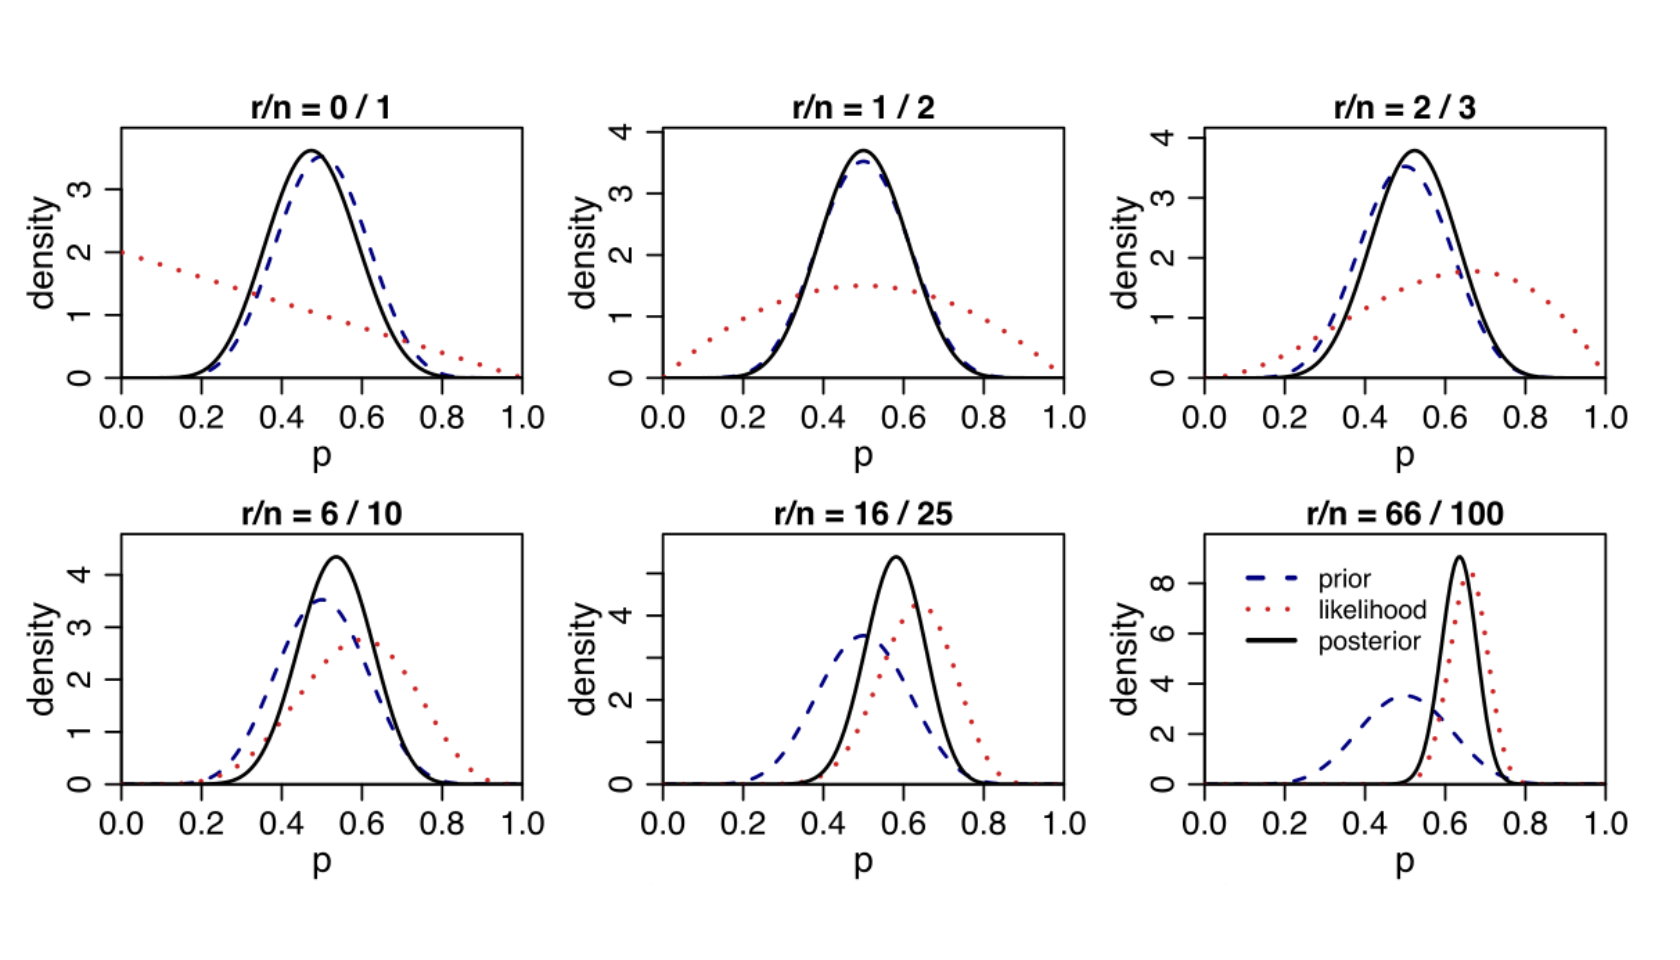

In [5]:
options(repr.plot.width = 14, repr.plot.height = 8)
img <- readPNG("./images/beta_binomial_cases.png"); grid.raster(img)

#### EXAMPLE
In proximity of the elections for student representatives in a University board, Anna, Chris, and Maggie decide to perform a survey among their classmates to evaluate how strong the chances are for their friend, who is a candidate. The aim is to infer the probability that their friend will be elected. Before conducting any interviews, each of them chooses a prior based on their beliefs.

* Anna believes there is a 20% chance their friend will be elected, with a standard deviation of 0.08. She assumes a $Beta(a,b)$ prior such that:
$$ E[x] = \frac{a}{a + b} = 0.2 \quad \quad \text{and} \quad \quad 
1 - E[x] = \frac{b}{a + b} = 0.8
\quad \quad \text{so} \quad \quad
\text{Var}[x] = \frac{ab}{(a + b)^2(a + b + 1)} = 0.08^2 = 0.0064
$$

    solving this yields $a = 4.8$ and $b = 19.2$.

* Chris is a new student and does not have any prior information or intuition about the candidate's popularity, so he assumes a uniform prior, which corresponds to a Beta distribution with $a = b = 1$.
* Maggie believes the probability distribution should be flat, but only within a certain interval. She therefore assumes a trapezoidal prior that is flat between 0.1 and 0.3, and zero elsewhere. This is a user-defined prior and not a standard Beta distribution.

They then proceed with the survey by interviewing $n = 100$ students who regularly visit the University canteen and are not personally known to them. Among these, $x = 26$ students state they will support and vote for their candidate friend.

To compute the posterior distribution, Anna and Chris use the Beta-binomial model, which allows for easy updating due to the conjugacy of the Beta prior with the Binomial likelihood.

* For Anna, the posterior becomes:
$$\text{Beta}(\alpha = 4.8 + 26, \beta = 19.2 + 74) = \text{Beta}(30.8, 93.2)$$

* For Chris, the posterior is:
$$\text{Beta}(\alpha = 1 + 26, \beta = 1 + 74) = \text{Beta}(27, 75)$$

* Maggie, having chosen a non-Beta prior, cannot use the conjugate update rule. She must compute the posterior numerically by multiplying her prior by the likelihood function and normalizing the result.


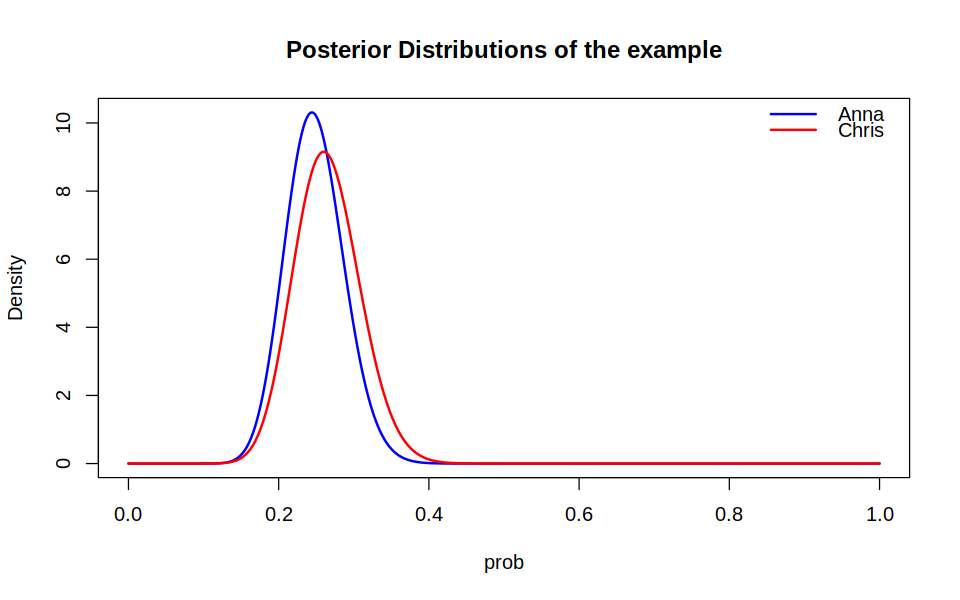

In [26]:
# Define x values
x_val <- seq(0, 1, 0.001)

# Define the two Beta posteriors
y1 <- dbeta(x_val, 30.8, 93.2)  # Anna
y2 <- dbeta(x_val, 27, 75)      # Chris

# Plot the first posterior
options(repr.plot.width = 8, repr.plot.height = 5)
plot(x_val, y1, type = "l", col = "blue", lwd = 2,
     xlab = 'prob', ylab = "Density",
     main = "Posterior Distributions of the example",
     ylim = range(c(y1, y2)))

# Add the second posterior
lines(x_val, y2, col = "red", lwd = 2)

# Add legend
legend("topright", legend = c("Anna", "Chris"), col = c("blue", "red"), lwd = 2, bty = "n")

## GAMMA-POISSON MODEL
Let's analyze counting experiments, where events occur randomly over a given time or space at a constant rate. A common model in such cases is the Poisson process. For example, we might want to estimate the number of car accidents at a street crossing per month.

#### LIKELIHOOD
The likelihood for a single measurement $y$ for a Poisson process, given the positive rate $\mu$, is:
$$ P(y \mid \mu) \sim Poisson( y \mid \mu ) = \frac{\mu^y e^{-\mu}}{y!}, \quad \mu > 0, \quad y = 0, 1, 2, \dots $$

For $n$ independent measurements, the total likelihood becomes: $ P(\{y_j\} \mid \mu) = \prod_{j=1}^n P(y_j \mid \mu) \propto \mu^{\sum y_j} \cdot e^{-n\mu} $. This form resembles the Gamma distribution: $ \text{Gamma}(y; \alpha, \lambda) = k y^{\alpha - 1} e^{-\lambda y}, \quad \text{where } k = \frac{\lambda^\alpha}{\Gamma(\alpha)} $. Comparing this to our case, we see that $\alpha = \sum_{j=1..n} y_j + 1$ and $\lambda = n$, so the likelihood coincide with a gamma distribution with such parameters (maybe?).

#### PRIORS for $\mu$
Depending on the prior knowledge, we can use different prior distributions for the searched rate $\mu$:

* **Uniform prior**: Used when there is no prior information about $\mu$. This is an improper prior (its integral diverges), and leads to a posterior that coincide with a Gamma distribution with parameters $\alpha = \sum y_j + 1$, $\lambda = n$. The uniform prior is given by a particular form of the Gamma distirbution:
$$ Gamma(\alpha, \lambda) = Gamma(1,0) $$

* **Jeffrey's prior**: Invariant under continuous transformations. A prior is invariant under continuous transformations if changing the parameter’s scale (e.g., from $\mu$ to $\log \mu$, or to $\sqrt{\mu}$) does not change the “information content” of the prior — the prior transforms in a way that makes inference consistent under reparametrizations. Similarly to before the prior is given by a particular form of the Gamma distirbution:
$$ Gamma(\alpha, \lambda) = Gamma(\frac{1}{2},0) $$

* **Conjugate prior**: The conjugate prior for the Poisson process is the Gamma distribution, here written as generic:
$$ Gamma(\alpha, \lambda) $$

* To choose a conjugate prior **starting from prior beliefs** like mean $m$ and standard deviation $s$, we can remembern that for a Gamma distribution:

$$ 
\mathbb{E}[\mu] = \frac{\alpha}{\lambda}, \quad \text{Var}[\mu] = \frac{\alpha}{\lambda^2}
\quad \text{so, inverting:} \quad\quad
Gamma(\alpha, \lambda) \quad \text{with} \quad
\alpha = \frac{m^2}{s^2}, \quad  \lambda = \frac{m}{s^2}
$$

So in general we can use some form of Gamma distribution.


#### POSTERIOR RESULTS
Using the generic prior $Gamma(\alpha, \lambda)$ and observing a single $y$, we get the posterior Gamma with $\alpha' = \alpha + y$ and $\lambda' = \lambda + 1$.

In general, for $n$ multiple observations $\{y_j\}$, using a Gamma$(\alpha, \lambda)$ prior, we end up with a posterior:
$$
Gamma(\alpha', \lambda')
\quad\quad where \quad\quad
\alpha' = \alpha + \sum y_j, \quad \lambda' = \lambda + n
$$

To obtain the posterior starting from a set of measurements, we can either start from a prior and then update the posterior (using $\alpha' = \alpha + y$ and $\lambda' = \lambda + 1$) at each measure we consider, or going straight for the result using the last written formula.

---

# 07 - FREQUENTIST AND BAYESIAN INFERENCE

## INTRODUCTION
The **frequentist approach** allows us to perform inference about a parameter by using probabilities calculated from the sampling distribution of the data. In this view, the parameter is considered fixed but unknown, and no probability can be associated with it. This framework supports different types of inference: point estimation, interval estimation, and hypothesis testing.

In contrast, the **Bayesian approach** revolves around the posterior distribution, which summarizes our updated belief about the parameter after observing data. The posterior contains all the necessary information to extract estimates and perform inference. In the Bayesian view, the parameter is treated as a random variable, and probability reflects our uncertainty or belief about its value.

Although the two approaches differ fundamentally in philosophy and interpretation, under certain conditions (especially large sample sizes), their results often converge. However, they are **not equivalent** in general.

## 7.1 - POINT ESTIMATION
Point estimation is the process of using sample data to calculate a single value (a point) that serves as a best guess or estimate for an unknown population parameter (like calculating the mean for some variable).

In the **frequentist** framework, the parameter is considered fixed but unknown. An estimator is said to be unbiased if its expected value equals the true parameter value: $ \mathbb{E}[\hat{\theta}] = \theta. $
In this case, the bias is zero, because they coincide. However, unbiased estimators can still have high variance, especially when the sample size is small. Therefore, even if the estimator is centered correctly on average, individual estimates may vary a lot.

In the **Bayesian** framework, the parameter is treated as a random variable with a prior distribution that represents our beliefs before seeing the data. After observing data, Bayes' theorem is used to update this belief and obtain the posterior distribution. A common point estimate in this setting is the posterior mean: $ \hat{\theta}_{\text{Bayes}} = \mathbb{E}[\theta \mid \text{data}]. $  
From a frequentist perspective, this estimator is typically biased, due to the influence of the prior. The prior effectively introduces a bias into the estimator! However, this bias often comes with the benefit of reduced variance. 

This **trade-off** is captured by the Mean Squared Error (MSE), which combines both bias and variance:

$$
\text{MSE}[\hat{\theta}] = \text{Bias}[\hat{\theta}]^2 + \text{Var}[\hat{\theta}].
$$

In small sample sizes, Bayesian estimators frequently outperform frequentist ones in terms of MSE because the prior helps stabilize the estimate. While the frequentist estimator is unbiased, it may have higher variance; the Bayesian estimator, though biased, can have much lower variance. This reflects a fundamental trade-off between bias and variance: sometimes, introducing a small bias can significantly reduce the overall estimation error.

#### EXAMPLE:  
This numerical example compares the Mean Squared Error (MSE) of the frequentist and Bayesian estimators for the success probability $p$ in a Bernoulli process with $p = 0.5$ and $n = 10$ trials.

For the frequentist estimator $\hat{p}_F = y/n$, we compute: $ \text{MSE}[\hat{p}_F] = \frac{0.5 \cdot 0.5}{10} = 0.025. $

For the Bayesian estimator $\hat{p}_B = \frac{1 + y}{2 + n}$, with a uniform prior $Beta(1,1)$, we find: $ \text{MSE}[\hat{p}_B] = \left( \frac{1 - 2 \cdot 0.5}{12} \right)^2 + \frac{10 \cdot 0.5 \cdot 0.5}{144} = 0 + \frac{2.5}{144} \approx 0.0174. $

The key interpretation here is that the Bayesian estimator has lower MSE than the frequentist one. This happens because the Bayesian estimate incorporates prior knowledge (even if uninformative, like a uniform prior), which slightly "shrinks" the estimate toward the center of the probability space. This reduces variance and can improve performance especially in small sample sizes. So the prior has a 'stabilizing' effect.

As a general rule, **in small samples Bayesian estimators often have lower MSE** because of this trade-off between bias and variance. As the sample size increases, both estimators tend to converge, and the influence of the prior diminishes.

## 7.2 - INTERVAL ESTIMATION
In interval estimation, the goal is to construct an interval within which the true value of an unknown parameter is expected to lie, with a certain level of confidence.

Under the **frequentist** approach we talk about **confidence intervals**, and the parameter is considered fixed but unknown. Before observing the data, the interval endpoints are random variables since they depend on the sample. Once the data is collected and the interval computed, the result is fixed: the interval either contains the true parameter or it does not. Thus, it is incorrect to interpret the confidence interval as providing the probability that the parameter lies within it.

A confidence interval at level $(1 - \alpha) \times 100\%$ for a parameter $\theta$ is defined as an interval $(\text{low}, \text{high})$ such that

$$
P(\text{low} \leq \theta \leq \text{high}) = 1 - \alpha.
$$

The interpretation is that if we repeat the experiment many times and compute the confidence interval each time, then $(1 - \alpha)\times 100\%$ of those intervals will contain the true parameter value. The most common methods for choosing the endpoints are either by ensuring equal ordinates on the sampling distribution (i.e., $f(\text{low}) = f(\text{high})$) or by assigning equal tail areas to the two sides of the distribution.

In the **Bayesian** approach to interval estimation we talk about **credible intervals**, which reflects the degree of belief that the true parameter lies within a certain range, given the observed data. This is fundamentally different from the frequentist confidence interval.

A $(1 - \alpha) \times 100\%$ Bayesian credible interval for a parameter $\theta$ is an interval $(\text{low}, \text{high})$ such that

$$
P(\text{low} \leq \theta \leq \text{high} \mid \text{data}) = 1 - \alpha,
$$

where the probability is a conditional one and refers to our belief about the parameter after having observed the data.

There are different ways to construct a credible interval. The most common is the equal-tailed credible interval (like for frequentist approach). **The posterior distribution is used to define the interval**. Once computed, the interval has a direct probabilistic interpretation: there is a $(1 - \alpha) \times 100\%$ probability that the true parameter lies within it, according to the posterior belief.



#### EXAMPLE:  
Let us now consider a practical example. In a small town, a sample of $n = 100$ residents is interviewed about a proposed concert hall. Of these, $y = 26$ express a positive opinion.

Using the frequentist method, an unbiased estimator of the proportion is simply $\hat{p}_F = \frac{y}{n} = 0.26, $ and the estimated standard deviation of the sampling distribution is $ \sigma = \sqrt{\frac{0.26(1 - 0.26)}{100}} = 0.0439. $

Moving to the Bayesian approach, suppose we choose a uniform prior for the unknown proportion, i.e., a Beta distribution with parameters $a = 1$ and $b = 1$. Since the Beta distribution is conjugate to the Binomial, the posterior distribution is also a Beta, given by $ \text{Beta}(a' = a + y, \, b' = b + n - y) = \text{Beta}(27, 75). $


## 7.3 - HYPOTHESIS TESTING AND P-VALUE
In hypothesis testing (HT), we aim to evaluate whether the data support a particular scientific theory. The typical approach in the frequentist framework is to assume that the effect does not exist — this assumption is called the **null hypothesis** ($H_0$). The goal is to assess whether the observed data are so incompatible with $H_0$ that we should reject it in favor of an alternative hypothesis ($H_1$), the one containing the effect. This process is also known as significance testing. Hypothesis testing can be one-sided, when we are interested in deviations in one direction, or two-sided, when we consider both directions of deviation. 

Rejecting $H_0$ does not prove that $H_1$ is true, but indicates that the observed data would be unlikely under $H_0$. On the other hand, not rejecting $H_0$ doesn't mean we believe it is literally true — it just means that the data are not sufficiently incompatible with it. The goal of HT is not to show that the alternative hypothesis is TRUE, but to show that the null hypothesis is FALSE. The NULL Hypothesis is deemed to be TRUE unless you, the researcher, can prove beyond reasonable doubts that it is FALSE.

In this framework, we can commit two types of errors:
- Type I error: rejecting $H_0$ when it is actually true, with probability $\alpha$
- Type II error: failing to reject $H_0$ when $H_1$ is true, with probability $\beta$

The power of a test is the probability of correctly rejecting $H_0$ when it is false, i.e., $1 - \beta$. In designing a test, we fix $\alpha$ at a conventional level such as 0.05 or 0.01, and try to minimize $\beta$.

The **steps in a frequentist hypothesis test** are:
1. Set up $H_0$ and $H_1$.
2. Determine the sampling distribution of the test statistic under $H_0$.
3. Choose the significance level $\alpha$ and define the critical region accordingly.
4. Compute the test statistic on the observed data.
5. If the test statistic lies in the critical region, we reject $H_0$, so we accept $H_1$. Otherwise we accept $H_0$.

An alternative approach is to compute the p-value, which is the probability under $H_0$ of observing data as extreme or more extreme than what was observed. If the p-value is less than $\alpha$, we reject $H_0$, so we accept $H_1$.

To add: functions like 'binom.test'

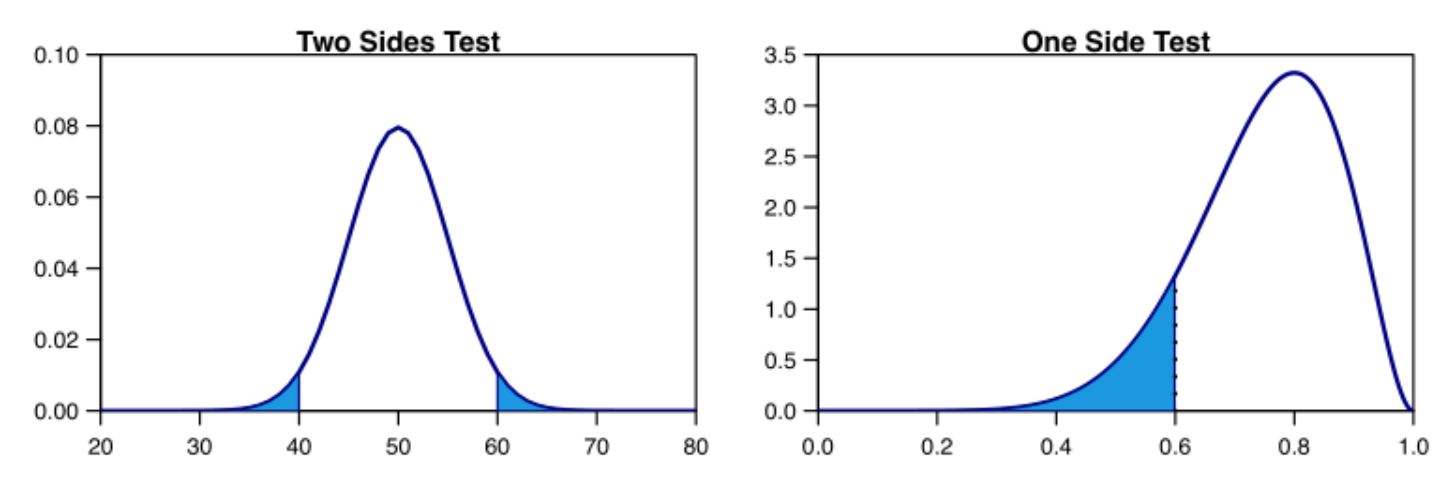

In [4]:
options(repr.plot.width = 12, repr.plot.height = 4); img <- readPNG("./images/one_side_two_side_test.png"); grid.raster(img)

#### EXAMPLE OF ONE-SIDE HYPOTHESIS
Consider the example of a treatment trial:
We want to test if a new treatment has a higher success rate than the standard one, known to have $p_0 = 0.6$. Out of 10 patients treated, $y = 8$ showed improvement.

In the **frequentist** HT approach, the hypotheses are:
$$
H_0: p \leq 0.6, \quad H_1: p > 0.6
$$

Assuming $H_0$ is true, the sampling distribution is obviously binomial: $y \sim \text{Bin}(n=10, p=0.6)$. For $\alpha = 0.05$, we find that $y=8$ is not in the rejection region. The p-value is

$$
\text{p-value} = P(Y \geq 8 \mid p = 0.6) = 0.1672,
$$

which is greater than $\alpha$, so we do not reject $H_0$.

In the **Bayesian** framework, we test the same hypotheses, but we compute the posterior probability that $p \leq 0.6$, given the data. Using a uniform prior $p \sim \text{Beta}(1,1)$ and observing $y=8$, the posterior is:

$$
P(p \mid y = 8) \sim \text{Beta}(1 + 8, 1+ 2) \sim \text{Beta}(9, 3)
$$

We then compute:

$$
P(p \leq 0.6 \mid y = 8) = \int_0^{0.6} \text{Beta}(p\mid 9, 3)\,dp = 0.1189
$$

Since $0.1189 > 0.05$, we do not reject $H_0$ at the 5% level (like before).


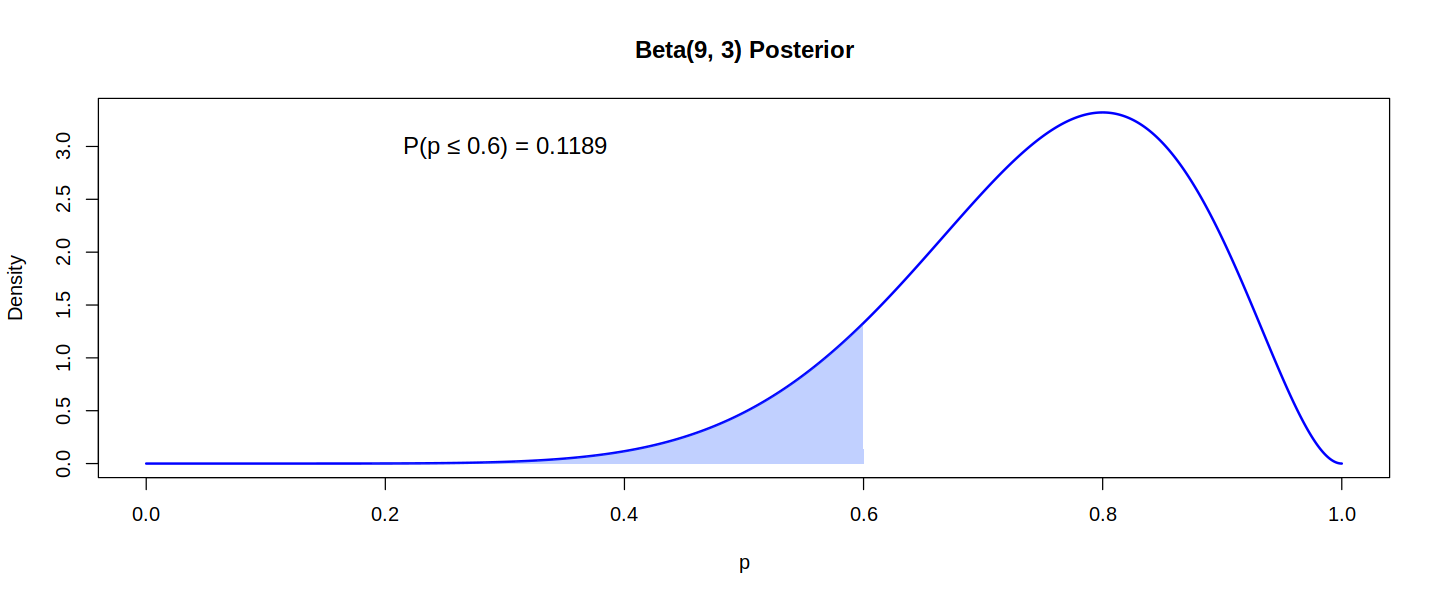

In [8]:
options(repr.plot.width = 12, repr.plot.height = 5)

# Define range and density
x <- seq(0, 1, length.out = 1000)
y <- dbeta(x, 9, 3)

# Compute area from 0 to 0.6
area <- pbeta(0.6, 9, 3)

# Plot
plot(x, y, type = "l", lwd = 2, col = "blue", 
     ylab = "Density", xlab = "p", main = "Beta(9, 3) Posterior")
polygon(c(x[x <= 0.6], 0.6), c(y[x <= 0.6], 0), col = rgb(0.2, 0.4, 1, 0.3), border = NA)

# Add text for the area
text(0.3, max(y) * 0.9, paste0("P(p ≤ 0.6) = ", round(area, 4)), cex = 1.2)

#### EXAMPLE OF TWO-SIDES HYPOTHESIS (da finire)

Suppose we toss a coin $n = 15$ times and observe $y = 10$ heads. We want to assess whether the coin is fair.

In a two-sided hypothesis test, we are interested in detecting deviations in either direction from a specific value of a parameter, say $p_0$. This leads us to formulate the null hypothesis as $H_0: p = p_0$, and the alternative hypothesis as $H_1: p \ne p_0$.

In the **frequentist** approach, we begin with the null hypothesis:

$$
H_0: p = 0.5, \quad H_1: p \ne 0.5
$$

The test statistic $y$ follows a binomial distribution under $H_0$, specifically $y \sim \text{Bin}(15, 0.5)$. Since the binomial distribution is discrete, we approximate the significance level $\alpha$ as closely as possible to 0.05 by choosing the rejection region:

$$
\{y \leq 3\} \cup \{y \geq 12\}, \quad \alpha = 0.0352
$$

The observed value $y = 10$ lies in the acceptance region, so we do not reject $H_0$. Alternatively, the p-value can be computed as the sum of the probabilities of observing a value at least as extreme as $y = 10$ under $H_0$:

$$
\text{p-value} = P(y \geq 10) + P(y \leq 5) = 0.3018
$$

Since this value is larger than the typical threshold of 0.05, we again do not reject the null hypothesis.

In the **Bayesian** approach, instead of testing a point hypothesis (which has zero probability), we consider whether the value $p_0$ lies within a credible interval derived from the posterior distribution. This provides a Bayesian analog to the confidence interval method. We place a uniform prior on $p$, i.e., $p \sim \text{Beta}(1, 1)$. Given the data, the posterior becomes:

$$ P (p \mid y = 10) \sim \text{Beta}(1+10,1+5) \sim \text{Beta}(11, 6) $$

We then compute a 95% credible interval for $p$. Using a normal approximation, the posterior mean is:

$$
\hat{p} = \frac{11}{11 + 6} = 0.647
$$

The posterior standard deviation is approximately:

$$
STD = \sqrt{ \frac{11 \cdot 6}{(11 + 6)^2 (11 + 6 + 1)} } \approx 0.113
$$

We identify the interval by multipling the standard deviation by 1.96 (because the 95% of confidence in the normal approximation identifies almost 2 standard deviation of spread):

$$
0.647 \pm 1.96 \cdot 0.113 \Rightarrow (0.426, 0.868)
$$

More precisely, using the Beta distribution, the interval is:

$$
(0.413, 0.849)
$$

Since $p_0 = 0.5$ lies within both intervals, we do not reject the null hypothesis in the Bayesian sense either.


---

# 08 - MARKOV CHAIN MONTE CARLO (MCMC)

### INTRODUCTION
In Bayesian inference, we are often interested in sampling from a complex posterior distribution $P(\theta \mid D)$, which represents our updated beliefs about the parameters $\theta$ after observing data $D$. In practice, this posterior is usually difficult to compute directly, especially when the parameter space is high-dimensional or when the normalization constant, known as the evidence $P(D)$, is intractable.

Standard Monte Carlo methods, which rely on independent sampling, are inefficient in this context because they spend too much time exploring regions where the posterior density is low. Instead, we want to generate more samples in regions where the posterior is high, while still ensuring that the overall sample set faithfully represents the target distribution.

**Markov Chain Monte Carlo (MCMC) methods offer a powerful and general approach to this problem. They allow us to approximate the posterior distribution by generating a sequence of dependent samples, forming a Markov chain that eventually converges to the target distribution.**

The principle behind MCMC is to construct a random walk through the parameter space, guided by the probability density function $f(\theta)$ we want to sample from (typically the posterior $P(\theta \mid D)$). This walk is implemented as a Markov chain, which is a memory-less stochastic process: the transition probability $Q(\theta_{t+1} \mid \theta_t)$ from one step tot the next one depends only on the current state $\theta_t$, not on the sequence of previous states.

A key advantage of MCMC is that it only requires us to evaluate the prior $P(\theta)$ and the likelihood $P(D \mid \theta)$ up to a multiplicative constant. This means we do not need to compute the evidence $P(D)$, which is the denominator of Bayes’ theorem. As long as we can compute an unnormalized version of the posterior,
$$
P^*(\theta \mid D) \propto P(D \mid \theta) P(\theta),
$$
we can apply MCMC to sample from it.

Once a sufficiently long chain is generated, the resulting samples can be used to estimate expectations such as
$$
\mathbb{E}[\theta] = \int \theta P(\theta \mid D) d\theta,
$$
and to construct histograms, credible intervals, or other summaries of the posterior.

In conclusion, MCMC provides an efficient and flexible way to sample from complex posterior distributions, even when direct computation is infeasible, by exploring the high-density regions of the parameter space through a carefully designed Markov process.

### ALGORITHM EXPLANATION

Among the most widely used MCMC methods are the Metropolis-Hastings algorithm and the Gibbs sampler. The former proposes new samples and accepts them with a probability that ensures convergence to the correct distribution, while the latter updates parameters one at a time using conditional distributions.

To effectively generate samples from a complex target distribution $f(\theta)$, such as a posterior distribution in Bayesian inference, the MCMC algorithm builds a Markov chain that explores the parameter space. At each step, the chain proposes a new point and decides whether to move to it or stay at the current point, based on how well the new point matches the desired distribution.

The algorithm relies on a **proposal distribution $Q(s \mid \theta)$**, which suggests a candidate sample $s$ for the next state $\theta_{t+1}$, given the current state $\theta_t$. This proposal distribution is typically easy to sample from. A common choice is a multivariate Gaussian centered at $\theta_t$, where the covariance matrix determines the typical step size in each parameter direction.

### STEPS OF METROPOLIS-HASTINGS ALGORITHM

The algorithm proceeds as follows:

1. Initialize the chain at some value $\theta_0$.

2. At each iteration $t$, generate a candidate $s$ from the **proposal distribution** $Q(s \mid \theta_t)$.

3. Compute the Metropolis ratio
   $$
   \rho = \frac{f(s) \cdot Q(\theta_t \mid s)}{f(\theta_t) \cdot Q(s \mid \theta_t)}.
   $$

4. If $\rho \geq 1$, accept the candidate: $\theta_{t+1} = s$.

5. If $\rho < 1$, accept the candidate with probability $\rho$:
   - draw $u \sim \mathcal{U}(0, 1)$ (from uniform distribution),
   - set $\theta_{t+1} = s$ only if $u \leq \rho$,
   - otherwise, set $\theta_{t+1} = \theta_t$ (i.e., repeat the current value).

This process is repeated for many iterations. The number of steps needed to obtain a good approximation of the target distribution depends on the problem, but typical values range from $10^4$ to $10^6$ samples.

If the proposal distribution is symmetric, such as a Gaussian where $Q(s \mid \theta_t) = Q(\theta_t \mid s)$, then the ratio simplifies to the **Metropolis algorithm**:
$$
\rho = \frac{f(s)}{f(\theta_t)}.
$$


It is important to note that the initial part of the chain might be biased by the choice of starting value. These early samples are not representative of the stationary distribution and should be discarded. This initial period is known as the **burn-in phase**. With a good initialization, the burn-in may only require a small portion of the total samples, typically a few percent.

### USING THE LOGARITHM OF THE PDF
In the Metropolis algorithm, but also in many other algoirithm, it is common to use the logarithm of the target distribution rather than the distribution itself. This change does not alter the theoretical result (because the logarithm is a monotone function), but it offers practical and numerical advantages.

Recall that the Metropolis acceptance ratio is defined as: $ \rho = \frac{f(x_{\text{new}})}{f(x_{\text{current}})} $

If $\rho \geq 1$, the proposed sample is always accepted. Otherwise, it is accepted with probability $\rho$.

When using logarithms, we instead compute the difference:

$$
\log \rho = \log f(x_{\text{new}}) - \log f(x_{\text{current}})
$$

In this case, the decision becomes: 
* if $\log \rho \geq 0$, accept the proposed sample.
* Otherwise, accept it with probability $\rho$, which can be done by comparing $\log \rho$ to $\log u$ where $u \sim \mathcal{U}(0, 1)$.

That is, we accept if:

$$
\log u < \log \rho
$$

There are several advantages to using the logarithmic form. First, it improves numerical stability. Many probability densities produce extremely small values, especially in high dimensions, leading to underflow when computed directly. However, their logarithms remain within a numerically safe range. Second, working with differences of logarithms is more stable than dividing very small numbers, particularly when the numerator and denominator are close. Finally, in many statistical applications, such as Bayesian inference or maximum likelihood estimation, the log-likelihood is often directly available and more convenient to compute.

#### EXERCISE - One-dimensional Sampling

Given the Cauchy distribution, where $x_0$ is the location parameter and $\gamma$ is the scale parameter:
$$ \text{Cauchy}(x \mid x_0, \gamma) = \frac{1}{\pi \gamma} \cdot \frac{1}{1 + \left( \frac{x - x_0}{\gamma} \right)^2} $$

We want to draw samples from $f(x)$ using Metropolis method:
$$ f(x) = \text{Cauchy}(x \mid -10, 2) + 4 \cdot \text{Cauchy}(x \mid 10, 4) $$

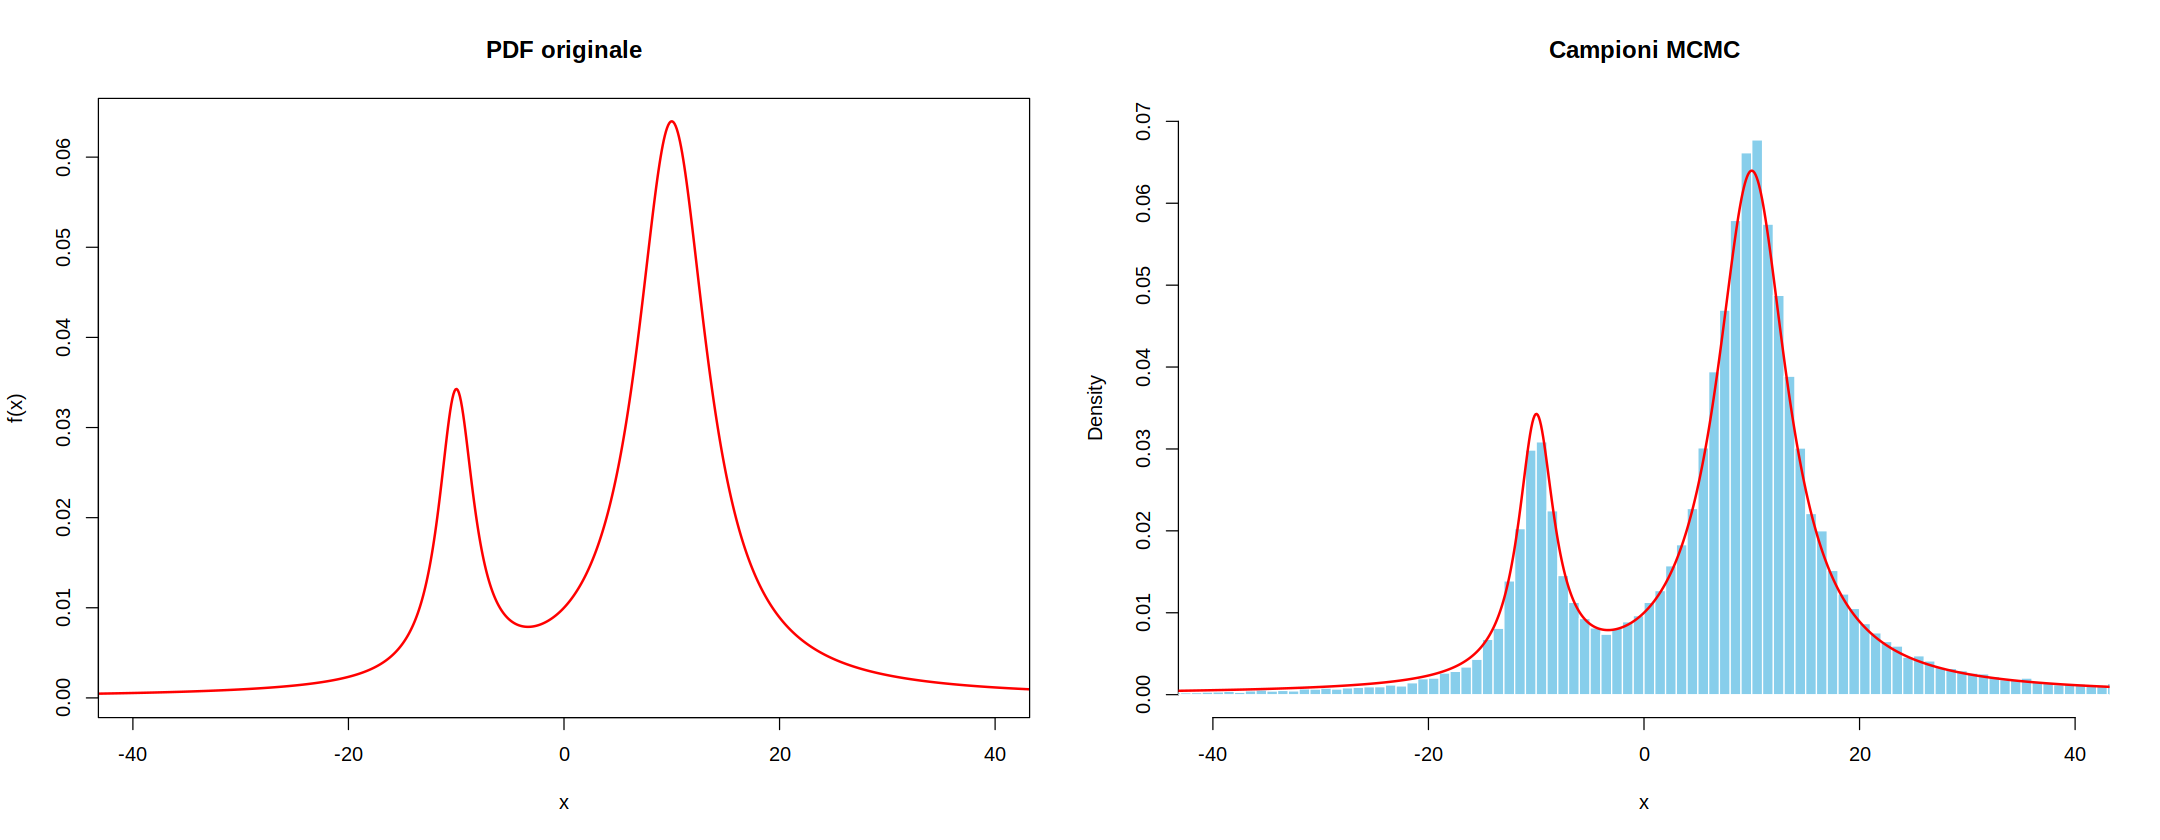

In [2]:
# PDF: somma di due Cauchy
pdf <- function(x) ( dcauchy(x, -10, 2) + 4 * dcauchy(x, 10, 4) ) / 5    # '/5' è la normalizzazione


# METROPOLIS mcmc (using the logarithm):
mcmc <- function(pdf, x_start, n, sigma) {
    # initialization:
    samples <- numeric(n)               # vettore numerico con dentro n zeri
    x_old <- x_start
    x_old_log <- log10( pdf(x_old) )
    # n iterazioni dell'algoritmo:
    for (i in 1:n) {
        x_new <- rnorm(1, x_old, sigma)         # pesco un numero da una gaussiana centrata nel x_old precedente
        x_new_log <- log10( pdf(x_new) )        # e ne calcolo il logaritmo della pdf
        log_rho <- x_new_log - x_old_log
        if (log_rho > 0 || log10(runif(1)) < (log_rho)) {   # '||' = or
            x_old <- x_new
            x_old_log <- x_new_log
        }
        samples[i] <- x_old    # aggiungo ai samples il numero (che sia quello nuovo se accettato o quello vecchio se quello nuovo è rigettato)
    } 
    return(samples)
}


# RUN algorithm:
samples <- mcmc(pdf, x_start = 0, n = 100000, sigma = 5)

# PLOT: 
options(repr.plot.width = 18, repr.plot.height = 7)
x <- seq(-50, 50, length.out = 1000)
y <- pdf(x)
par(mfrow = c(1, 2))
plot(x, y, type = "l", col = "red", lwd = 2, main = "PDF originale",
     xlab = "x", ylab = "f(x)", xlim=c(-40,40))
samples <- samples[ samples>-40 | samples<40 ]     # to cut tails for plot
hist(samples, breaks = 400, freq = FALSE, col = "skyblue", border = "white",
     main = "Campioni MCMC", xlab = "x", xlim=c(-40,40), ylim=c(0,0.07))
lines(x, y, col = "red", lwd = 2)

### MCMC CHAIN ANALYSIS

When using the Metropolis-Hastings algorithm or similar MCMC methods, it is important to verify whether the chain has converged and is producing a representative sample from the target distribution. Although the algorithm may be valid in principle, poor choices of parameters or insufficient sampling may result in biased or unrepresentative samples.

**One simple diagnostic method is to run multiple chains starting from different initial values**. If all chains converge to the same region of the parameter space, this is a good indication that the algorithm has reached a steady state.

**To analyze the quality of the chain, one useful tool is the auto-correlation function (ACF)**. The ACF measures how much each value in the chain is correlated with its past values, which helps assess how well the chain mixes. A slow decay in ACF indicates poor mixing and suggests that the chain moves slowly through the parameter space.

Given a chain of length $N$, and a lag $h$ (=number of steps between the two values of the chain), the auto-correlation function is defined as:

$$
\text{ACF}(h) = \frac{\sum_{t=1}^{N-h} (\theta_t - \bar{\theta})(\theta_{t+h} - \bar{\theta})}{(N - h)} \bigg/ \frac{\sum_{t=1}^{N} (\theta_t - \bar{\theta})^2}{(N - 1)}
$$

Here, $\theta_t$ denotes the value of the chain at time step $t$, and $\bar{\theta}$ is the mean of the chain.

The R package `CODA` (see below chapter for more info) provides several functions to summarize and analyze MCMC output. This package can also perform diagnostic checks for convergence. To use CODA, the MCMC output should be converted into an object of class `mcmc` or `as.mcmc`. The input can be a numeric vector or a matrix where each column corresponds to a different parameter. Two particularly useful functions provided by CODA are:

- `autocorr()`: computes the auto-correlation function for the chain at given lags. High auto-correlation values suggest slow mixing and hence slow convergence.
- `effectiveSize()`: estimates the effective sample size, accounting for the auto-correlation in the chain. A smaller effective size indicates that fewer independent samples have been obtained.

**Thinning** means keeping only every $k$-th sample from the MCMC chain, e.g. keeping only every 10th sample. This is done to reduce autocorrelation between samples (especially if the chain moves slowly), and reduce storage requirements, since MCMC chains can be long.

### PARAMETER TRANSFORMATION

In some situations, it can be more efficient to sample over a transformed parameter instead of the original one. For example, consider a parameter $\theta$ that is strictly positive. Instead of sampling $\theta$ directly, it may be advantageous to sample $\ln \theta$. This guarantees that the parameter remains positive throughout the sampling process.

However, sampling in terms of $\ln \theta$ means that we are drawing samples from the distribution $P(\ln \theta)$ rather than from $P(\theta)$. These are related through the change of variables formula: $ P(\theta) \, d\theta = P(\ln \theta) \, d(\ln \theta) \quad \Rightarrow \quad P(\ln \theta) = \theta P(\theta) $

When using a symmetric proposal distribution, such as a Gaussian, the proposal probability satisfies: $ Q(\theta_t \to s) = Q(s \to \theta_t)$

In this case, the Metropolis-Hastings acceptance ratio becomes: $ \rho = \frac{s P(s)}{\theta_t P(\theta_t)} $


In the general case of a multivariate transformation from parameters $(\theta_1, \dots, \theta_J)$ to $(\phi_1, \dots, \phi_J)$, the Jacobian determinant must be included to properly account for the change of variables. The Jacobian is defined as:

$$
J_{\theta} = \left| \frac{\partial (\theta_1, \dots, \theta_J)}{\partial (\phi_1, \dots, \phi_J)} \right|
$$

The Metropolis-Hastings ratio then becomes:

$$
\rho = \frac{P(s) \, J_s}{P(\theta_t) \, J_{\theta}}
$$

### PRIORS FOR THE PARAMETERS

Let's take, for example, a linear model with parameters given by $f(x) = b_0 + b_1 x + \epsilon $, with $\epsilon$ being the noise. A good choice fot he priors could be:

- The intercept $b_0$ is assigned a Gaussian prior $P(b_0) = \mathcal{N}(\mu, \sigma)$.
- For the slope $b_1$, we reparametrize it as $b_1 = \tan \alpha$, where $\alpha$ is the angle between the model line and the horizontal axis. Assuming no prior knowledge, we use a uniform prior over the angle: $P(\alpha) = \frac{1}{2\pi}$.
- For the noise standard deviation $\sigma$, which is a scale parameter, we assign a Jeffreys prior. This is done by sampling $\log \sigma$ uniformly, i.e., $P(\log \sigma) = \text{const}$, which implies $P(\sigma) \propto \frac{1}{\sigma}$.

Therefore, the parameters we actually sample are $(b_0, \alpha, \log \sigma)$, and the prior distributions are defined over these transformed parameters.


### MCMC WITH MULTIPLE PARAMETERS

When using MCMC to sample a posterior distribution for one parameter, it's enough to use a univariate Gaussian as the **proposal distribution**, which is fully specified by a mean (centered on the current parameter value) and a standard deviation (which controls the size of the steps).

However, when dealing with multiple parameters, you need to account not only for the individual variances of each parameter (i.e., how much each one typically changes), but also for any correlations between parameters (i.e., whether changing one parameter affects the others).

To capture both the variances and the correlations, you use a multivariate Gaussian proposal distribution, which is specified by:
* a mean vector, i.e. a vector with the means for the proposal distrib of each parameter
* a covariance matrix $\Sigma$, which encodes:
    * the variance of each parameter along the diagonal
    * the covariance (linear dependency) between pairs of parameters in the off-diagonal entries.

The dimension of $\Sigma$ is $d \times d$, where $d$ is the number of parameters being sampled. For example, if we are sampling three parameters—such as the intercept $b_0$, the angle parameter $\alpha$, and the logarithm of the standard deviation $\log \sigma$—then $\Sigma$ is a $3 \times 3$ matrix.

The diagonal elements of $\Sigma$ determine the variances of each parameter in the proposal distribution, which translates into how large a step the algorithm is likely to propose in each direction. The off-diagonal elements, on the other hand, represent the covariances between parameters. These capture any linear dependencies and correlations, allowing the algorithm to propose joint movements that are more likely to be accepted if the parameters are indeed correlated in the posterior.

Choosing an appropriate $\Sigma$ is important. If the values are too small, the chain moves in tiny steps and explores the space slowly. If they are too large, the proposals may often fall in low-probability regions and get rejected. An optimal $\Sigma$ captures the shape of the posterior distribution, including its correlations, which helps the chain converge faster and sample more efficiently.

In practice, one might begin with a diagonal matrix containing moderate values, then adapt $\Sigma$ during a warm-up or burn-in phase—a technique known as adaptive MCMC. Alternatively, one can estimate a good covariance matrix from a preliminary or pilot run.




### POSTERIOR PREDICTIVE DISTRIBUTION (???)

Once we have inferred the posterior distribution of the model parameters, we can use this information to make predictions for new data points. Suppose we want to predict the value $y_p$ corresponding to a new input $x_p$. Instead of using a single "best" set of parameters, we incorporate the uncertainty in the parameters by marginalizing over the posterior distribution.

This leads to the definition of the **posterior predictive distribution**:

$$
P(y_p \mid x_p, D) = \int P(y_p \mid x_p, \theta) \, P(\theta \mid D) \, d\theta
$$

There are two main ways to evaluate this distribution:

* Direct Method:
This method is more accurate but computationally slower. For a fixed value of $y_p$, we evaluate the likelihood $P(y_p \mid x_p, \theta_j)$ for each posterior sample $\theta_j$, and then average these values:

$$
P(y_p \mid x_p, D) \approx \frac{1}{N_s} \sum_{j=1}^{N_s} P(y_p \mid x_p, \theta_j)
$$

This gives us a posterior-weighted average of the likelihoods. We repeat this over a grid of $y_p$ values to build the full distribution.

* Indirect Method:
This approach is based on sampling the joint distribution $P(y_p, \theta \mid x_p, D)$ directly and then marginalizing over $\theta$. We factorize the joint distribution as:

$$
P(y_p, \theta \mid x_p, D) = P(y_p \mid x_p, \theta) \, P(\theta \mid D)
$$

We already have samples $\{\theta_j\}$ from the posterior $P(\theta \mid D)$ thanks to MCMC. For each of these, we generate a sample $y_p^{(j)}$ from the likelihood, which is assumed to be a Gaussian. Its mean is the model prediction at $x_p$, evaluated using the parameters $(b_0^{(j)}, b_1^{(j)})$, and its standard deviation is $\sigma^{(j)}$.

### SUMMARY OF STEPS FOR FINDING THE POSTERIOR WITH MCMC
To compute this posterior using MCMC, we proceed through the following steps:

1. Define reasonable and plausible **prior distributions** for the parameters. If necessary, use transformations to ensure parameter constraints (e.g., log-transform for positive values).
2. Choose the covariance matrix of the **proposal distribution**. Typically, this is a diagonal matrix corresponding to a multivariate Gaussian.
3. Select the starting point of the Markov chain.
4. Set the number of burn-in and sampling iterations.

Apply **MCMC** to collect samples, then perform the following analyses:

5. Use **thinning** to the chains, if necessary, to reduce auto-correlation.
6. Plot the individual chains (i.e. parameter value over the iterations) to see whether the chain has converged. And plot also the one-dimensional marginal posterior distributions of the parameters.
7. Visualize the two-dimensional posterior distributions for all parameter pairs by plotting the MCMC samples. This helps identify potential correlations between parameters. For example, if $\theta = (b_0, \alpha, \log \sigma)$, you would make scatter plots of $(b_0, \alpha)$, $(b_0, \log \sigma)$, and $(\alpha, \log \sigma)$. If the plots show an elongated shape or clear pattern, this indicates a correlation between the parameters.
8. Calculate the maximum a posteriori (MAP) estimates of the model parameters from the MCMC samples. Plot the resulting model and compare it to the observed data.
9. Compute the predictive posterior distribution for new data points. Since we already have samples from the posterior, we can draw predictions without evaluating the posterior density or performing integration. This allows us to estimate the marginal distributions of individual parameters directly from the samples. For each posterior sample $\theta^{(i)}$, you compute: $ y^{(i)} = f(x_{\text{new}}; \theta^{(i)}) + \epsilon^{(i)} $ where $\epsilon^{(i)}$ is drawn from the noise model (e.g., a Gaussian with standard deviation given by $\sigma^{(i)}$ from the same sample).



---

### ALTERNATIVE MCMC ALGORITHM: GIBBS SAMPLING

The key idea of Gibbs sampling is to simplify the problem by focusing on one parameter at a time. Instead of trying to sample from the full joint distribution of all parameters at once, we break it down into a series of easier steps. At each step, we sample one parameter while keeping the others fixed, using its **conditional distribution**.

Imagine we have two parameters, $\theta_1$ and $\theta_2$. Instead of sampling from the joint distribution $P(\theta_1, \theta_2)$ directly, we alternate between:

$$
\theta_1^{(t+1)} \sim P(\theta_1 \mid \theta_2^{(t)})
$$

$$
\theta_2^{(t+1)} \sim P(\theta_2 \mid \theta_1^{(t+1)})
$$

This process produces a sequence of samples $(\theta_1^{(t)}, \theta_2^{(t)})$ that, after a while, represent samples from the true joint distribution.

Going more in general, suppose we want to sample from a posterior distribution $P(\theta_1, \theta_2, \dots, \theta_d \mid \text{data})$, where $\theta = (\theta_1, \theta_2, \dots, \theta_d)$ is the vector of model parameters. In Gibbs sampling, we update each parameter one at a time, conditioning on the most recent values of the others.

The algorithm proceeds as follows: at iteration $t+1$, we sample:
$$
\theta_1^{(t+1)} \sim P(\theta_1 \mid \theta_2^{(t)}, \theta_3^{(t)}, \dots, \theta_d^{(t)}, \text{data}),
$$
$$
\theta_2^{(t+1)} \sim P(\theta_2 \mid \theta_1^{(t+1)}, \theta_3^{(t)}, \dots, \theta_d^{(t)}, \text{data}),
$$
$$
\theta_3^{(t+1)} \sim P(\theta_3 \mid \theta_1^{(t+1)}, \theta_2^{(t+1)}, \dots, \theta_d^{(t)}, \text{data}),
$$
and so on, until
$$
\theta_d^{(t+1)} \sim P(\theta_d \mid \theta_1^{(t+1)}, \dots, \theta_{d-1}^{(t+1)}, \text{data}).
$$

This process is repeated for many iterations, and the sequence of samples converges to the joint posterior distribution.

One of the main advantages of Gibbs sampling is that it does not require computing acceptance probabilities. Each sample is drawn from the exact conditional distribution, so it is always accepted. This contrasts with Metropolis-Hastings, which requires proposing new values and then accepting or rejecting them based on an acceptance ratio.

Gibbs sampling is particularly efficient when the full conditional distributions are of known form (such as Gaussian, Gamma, or Beta), which often occurs in models with conjugate priors. In such cases, we can draw samples directly using standard functions.

However, if the conditionals are not analytically tractable or are difficult to sample from, Metropolis-Hastings is more general and usually preferred.

Visually, Gibbs sampling moves parallel to the coordinate axes in parameter space. For example, consider a two-dimensional posterior distribution with parameters $\theta_1$ and $\theta_2$. Starting from an initial point $(\theta_1^{(0)}, \theta_2^{(0)})$, we first draw a new value for $\theta_1$ from the full conditional distribution $P(\theta_1 \mid \theta_2^{(0)}, y)$, effectively slicing horizontally through the joint distribution. Then, fixing $\theta_1^{(1)}$, we sample a new $\theta_2$ from $P(\theta_2 \mid \theta_1^{(1)}, y)$, slicing vertically. This process is repeated, and the chain explores the joint posterior distribution by alternating these axis-aligned steps.

---

# 09 - MCMC IN R

## INTRODUCTION
In modern statistical analysis, particularly within the Bayesian framework, it is often necessary to work with complex probability distributions for which analytical solutions are intractable. In such cases, we rely on simulation-based methods to approximate quantities of interest — and this is where Markov Chain Monte Carlo (MCMC) methods come into play.

With MCMC we refers to a family of algorithms that allow us to draw samples from a probability distribution when direct sampling is difficult or impossible. These samples can then be used to approximate expectations, marginal distributions, or other statistical summaries. Classical MCMC algorithms include the **Metropolis-Hastings** and **Gibbs sampling**, which have been foundational in Bayesian computation, then we have more modern ones like **Hamiltonian Monte Carlo** (HMC).

Two widely used tools that implement MCMC for Bayesian inference are JAGS and STAN:
* **JAGS** (Just Another Gibbs Sampler) uses Gibbs sampling and Metropolis-Hastings, and is particularly user-friendly for building hierarchical models in a BUGS-like syntax. It integrates smoothly with R through the rjags package.
* **STAN** is a modern probabilistic programming language that uses Hamiltonian Monte Carlo (HMC) and the No-U-Turn Sampler (NUTS) to efficiently sample from high-dimensional posterior distributions. It is known for its speed and accuracy. In R, it is accessed through interfaces like rstan and brms.

Both JAGS and STAN run multiple MCMC chains — and this is strongly recommended in Bayesian inference for proper diagnostics and convergence assessment. This increases robustness and reliability of posterior summaries.

After the sampling we can use **CODA**. CODA (Convergence Diagnosis and Output Analysis) it’s an R package designed to help store, summarize, and visualize MCMC output. It performs diagnostics and compute posterior summaries like means, variances, credible intervals, and more.

## JAGS
JAGS stands for Just Another Gibbs Sampler. It is a program for Bayesian statistical analysis using Markov Chain Monte Carlo (MCMC) methods, especially Gibbs sampling. It allows you to define hierarchical Bayesian models in a simple, declarative language: the BUGS language. You can use JAGS from R via the `rjags` or `runjags` packages.

Basic workflow:
* Write your model in the JAGS language (usually as a string or saved in a .txt file).
* Load your data into R and format it as a list.
* Compile the model using jags.model() from the rjags package.
* Run the sampler with coda.samples() or jags.samples().
* Analyze the output, e.g., using the coda package for diagnostics and plots.

#### BUGS LANGUAGE
The BUGS language (Bayesian inference Using Gibbs Sampling) provides a compact and expressive way to define Bayesian statistical models. It is closely tied to graphical models: each variable (known or unknown) is a node in a graph, and dependencies are shown by edges.  
For example, in the graphical model:

```
A     B
 \   /
  \ /     
   C    D
   | \/ |
   | /\ |
   E    F
```

The joint distribution of all variables can be factorized as: $P(A,B,C,D,E,F)=P(A)P(B)P(C∣A,B)P(D)P(E∣C,D)P(F∣C,D)$. This structure is automatically handled by BUGS/JAGS when you write the model.

EXAMPLE:  
given a set of observation, coming from a Bernoulli process, we want to infere the probability $p$ of the process from the sequence of success/failure, and predict the number of successes in the future. We describe the model with BUGS and let jags solve our inference problem.

Using info on the prior and likelihood, jags will compute the posterior over $p$ (using Gibbs sampling), i.e. it will draw many samples from the posterior distribution of $p$. These samples represent the posterior distribution numerically. Once JAGS samples a value $p^{(i)}$ it also samples: $y(i)∼Binomial(n_{next},p^{(i)})$. So for each draw of $p$, JAGS draws a corresponding future prediction $y$. After many iterations, you get a distribution over $p$ (posterior) and a distribution over $y$ (predictive).

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 100
   Unobserved stochastic nodes: 2
   Total graph size: 104

Initializing model


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

    Mean      SD  Naive SE Time-series SE
p 0.1669 0.03667 0.0003667      0.0003667
y 1.6745 1.23284 0.0123284      0.0123284

2. Quantiles for each variable:

    2.5%   25%    50%    75% 97.5%
p 0.1015 0.141 0.1649 0.1907 0.245
y 0.0000 1.000 2.0000 2.0000 4.000



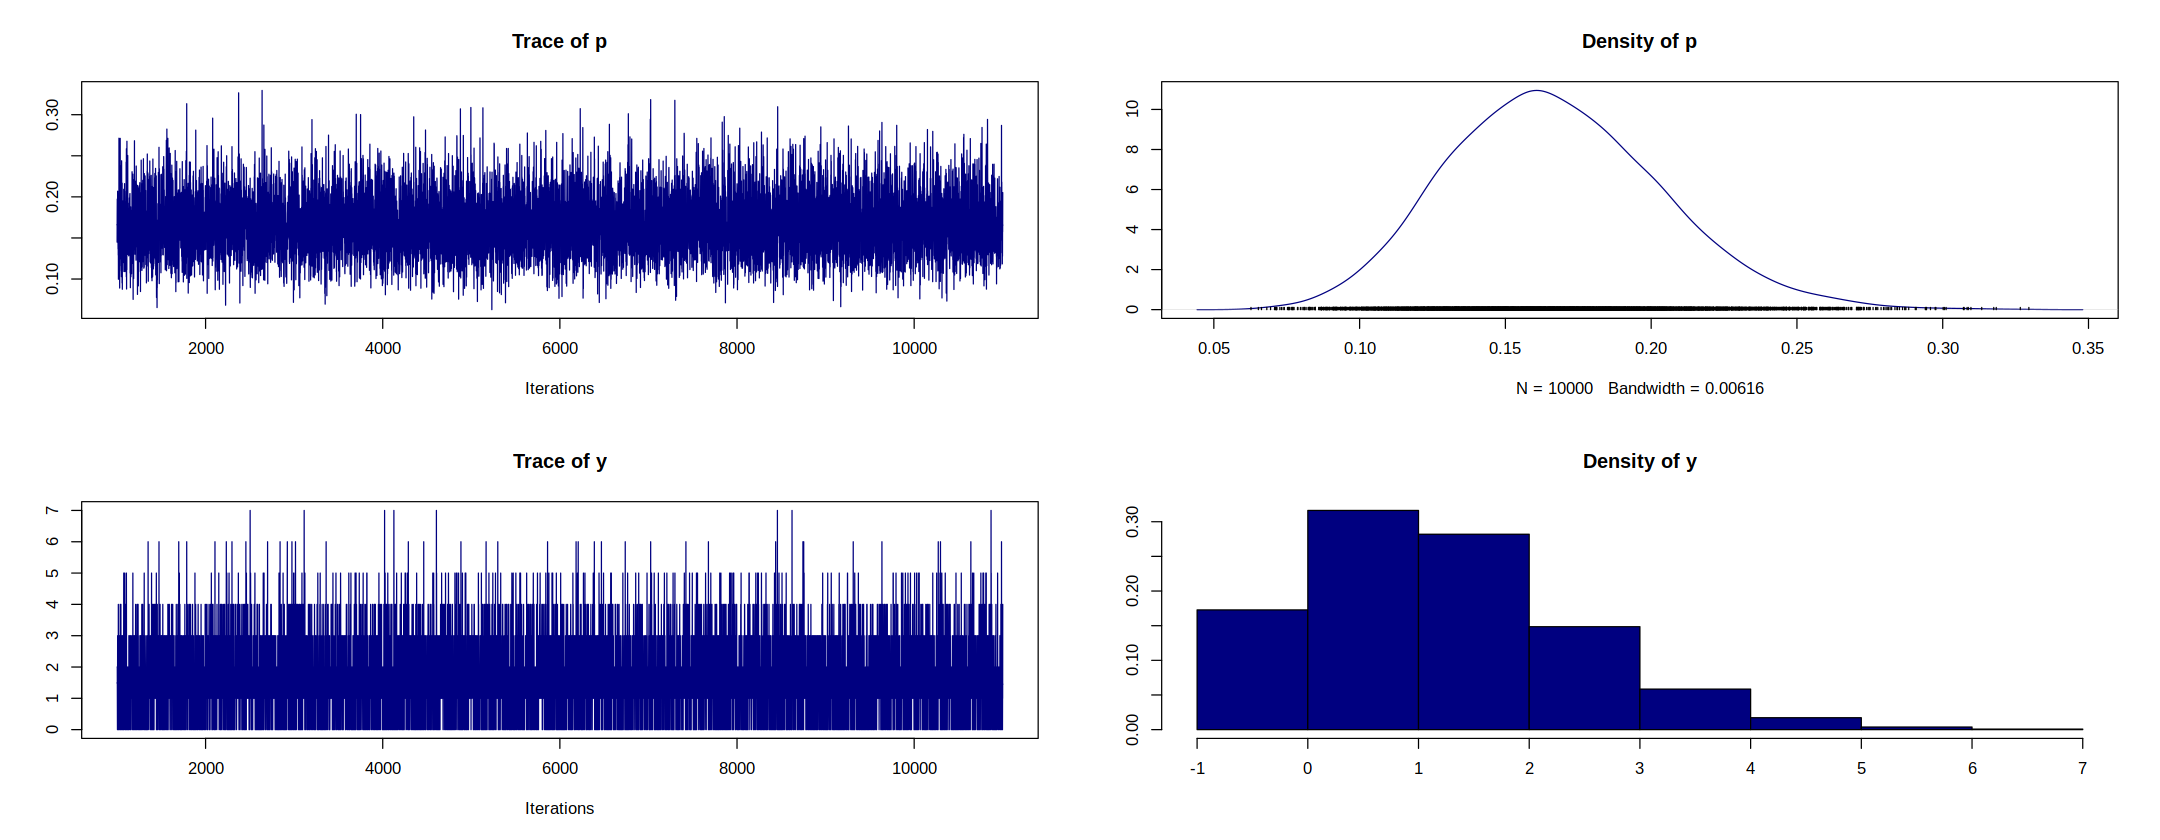

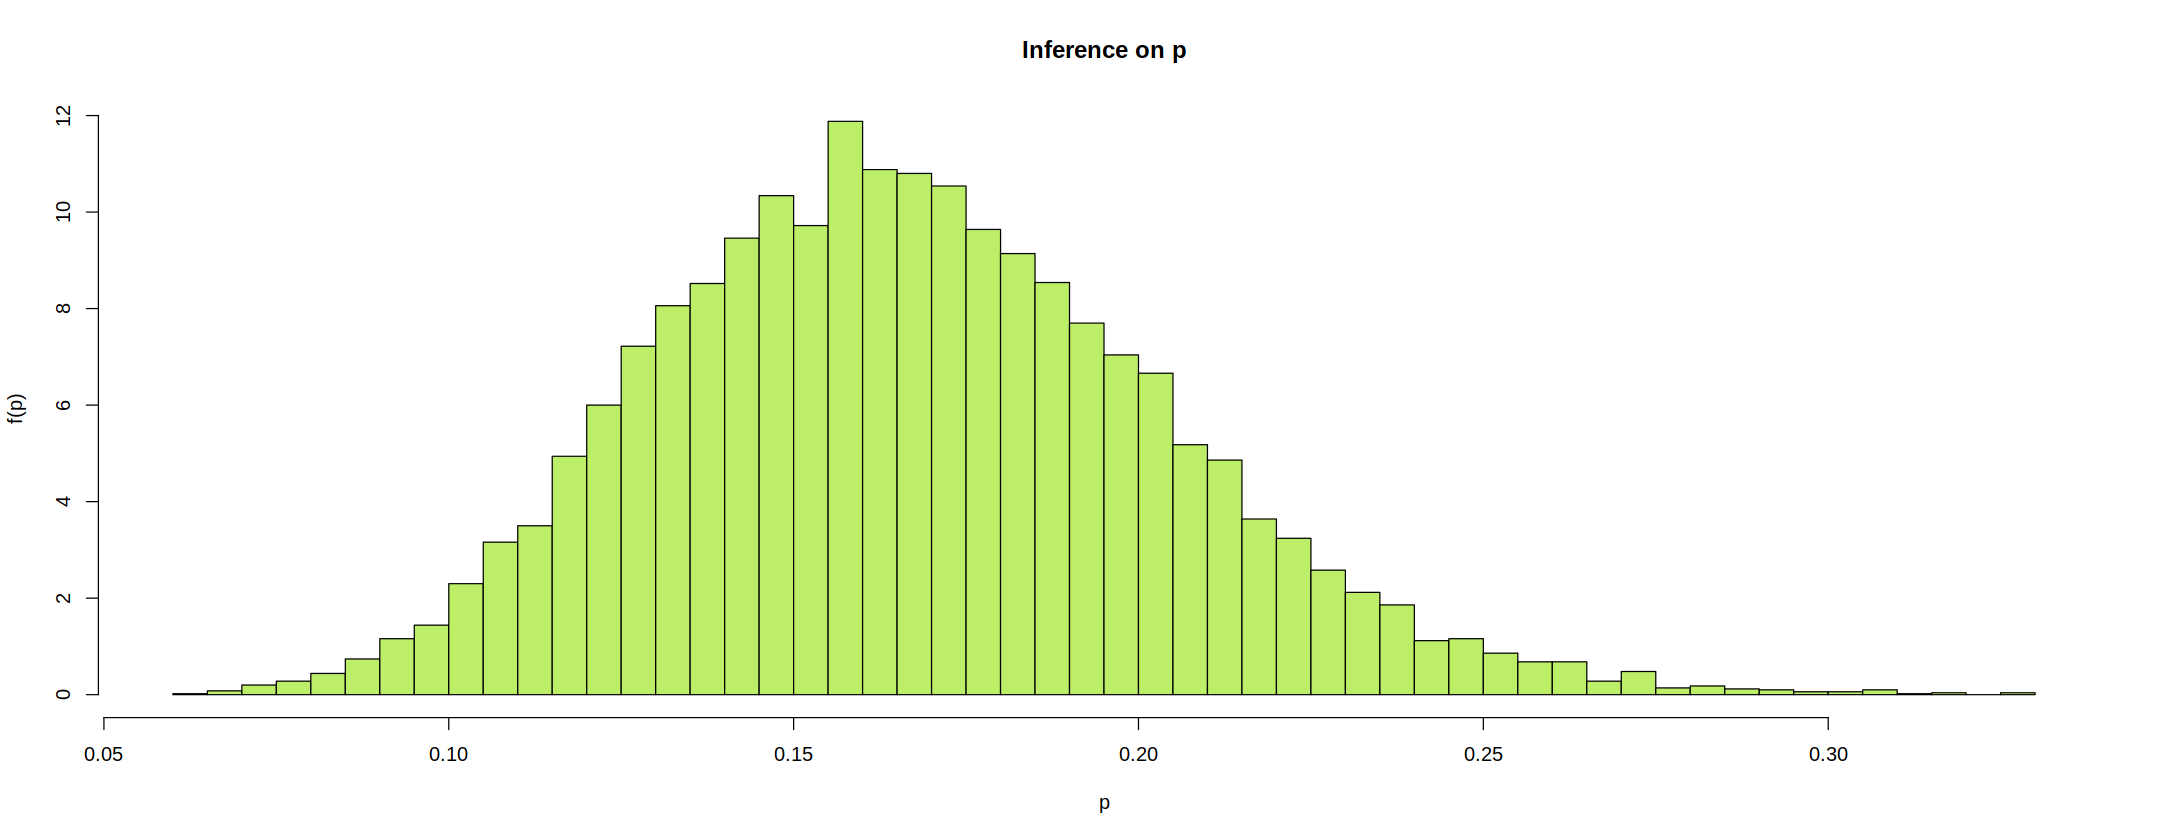

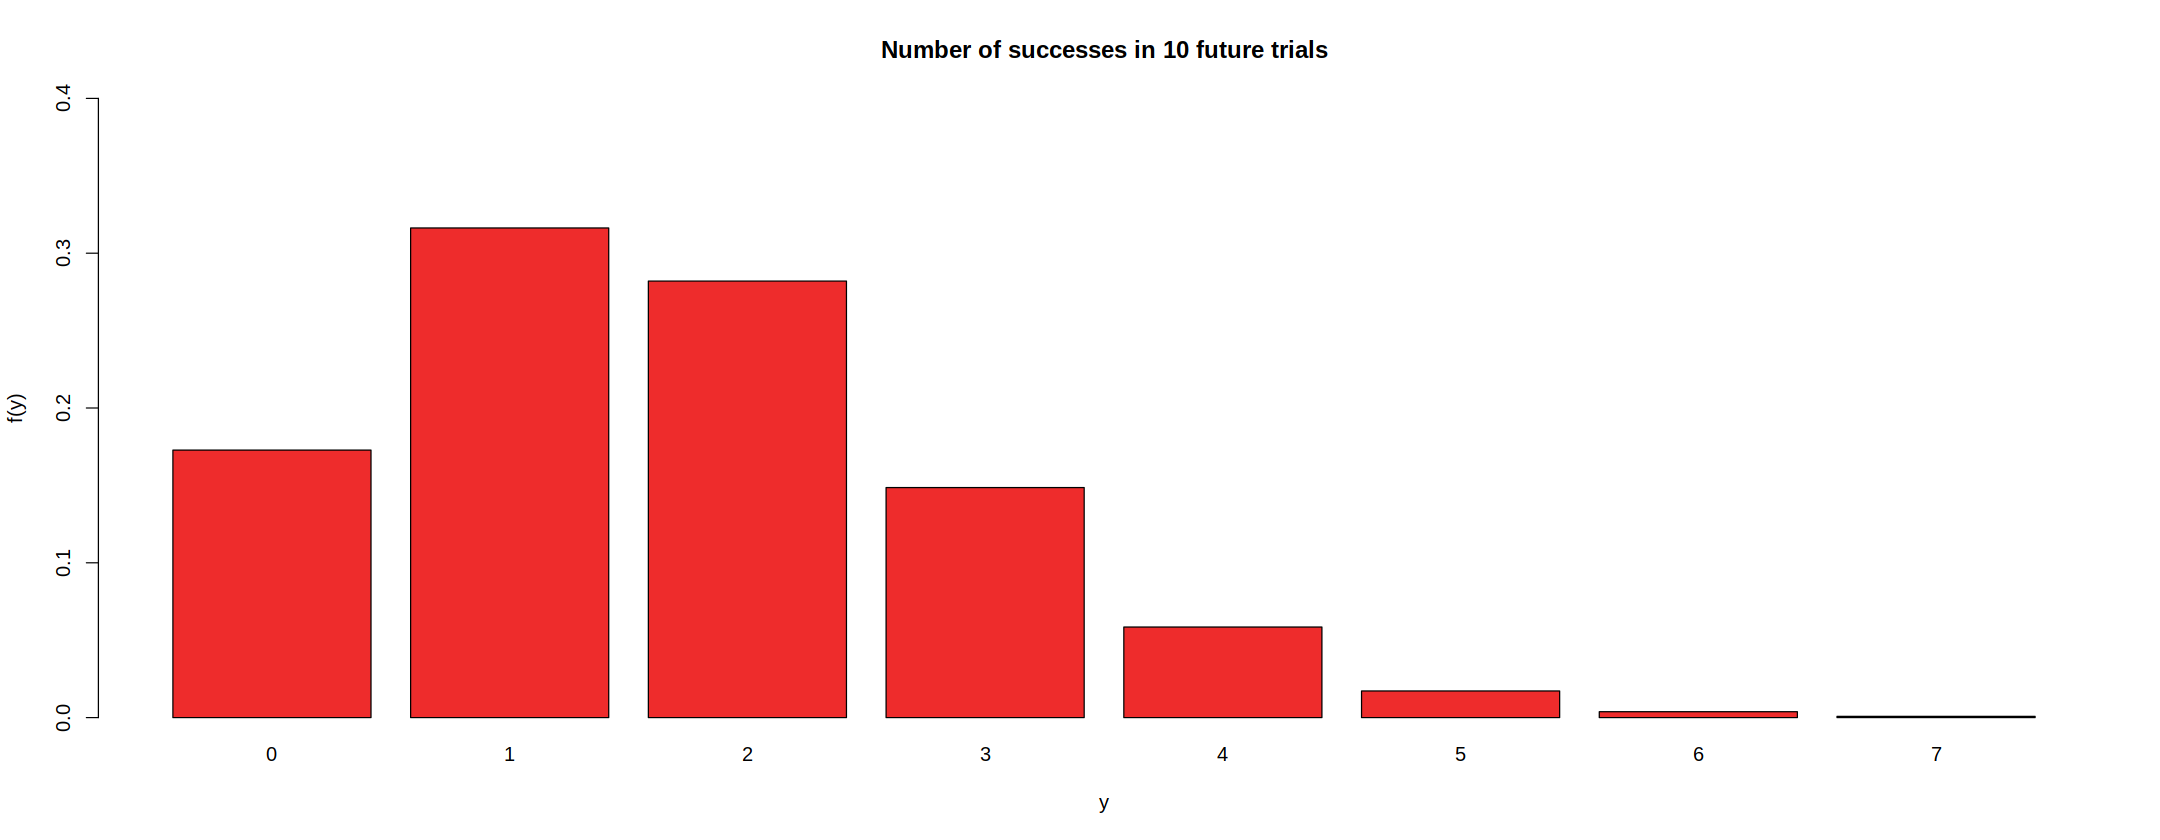


Correlation matrix:
          p         y
p 1.0000000 0.2987712
y 0.2987712 1.0000000


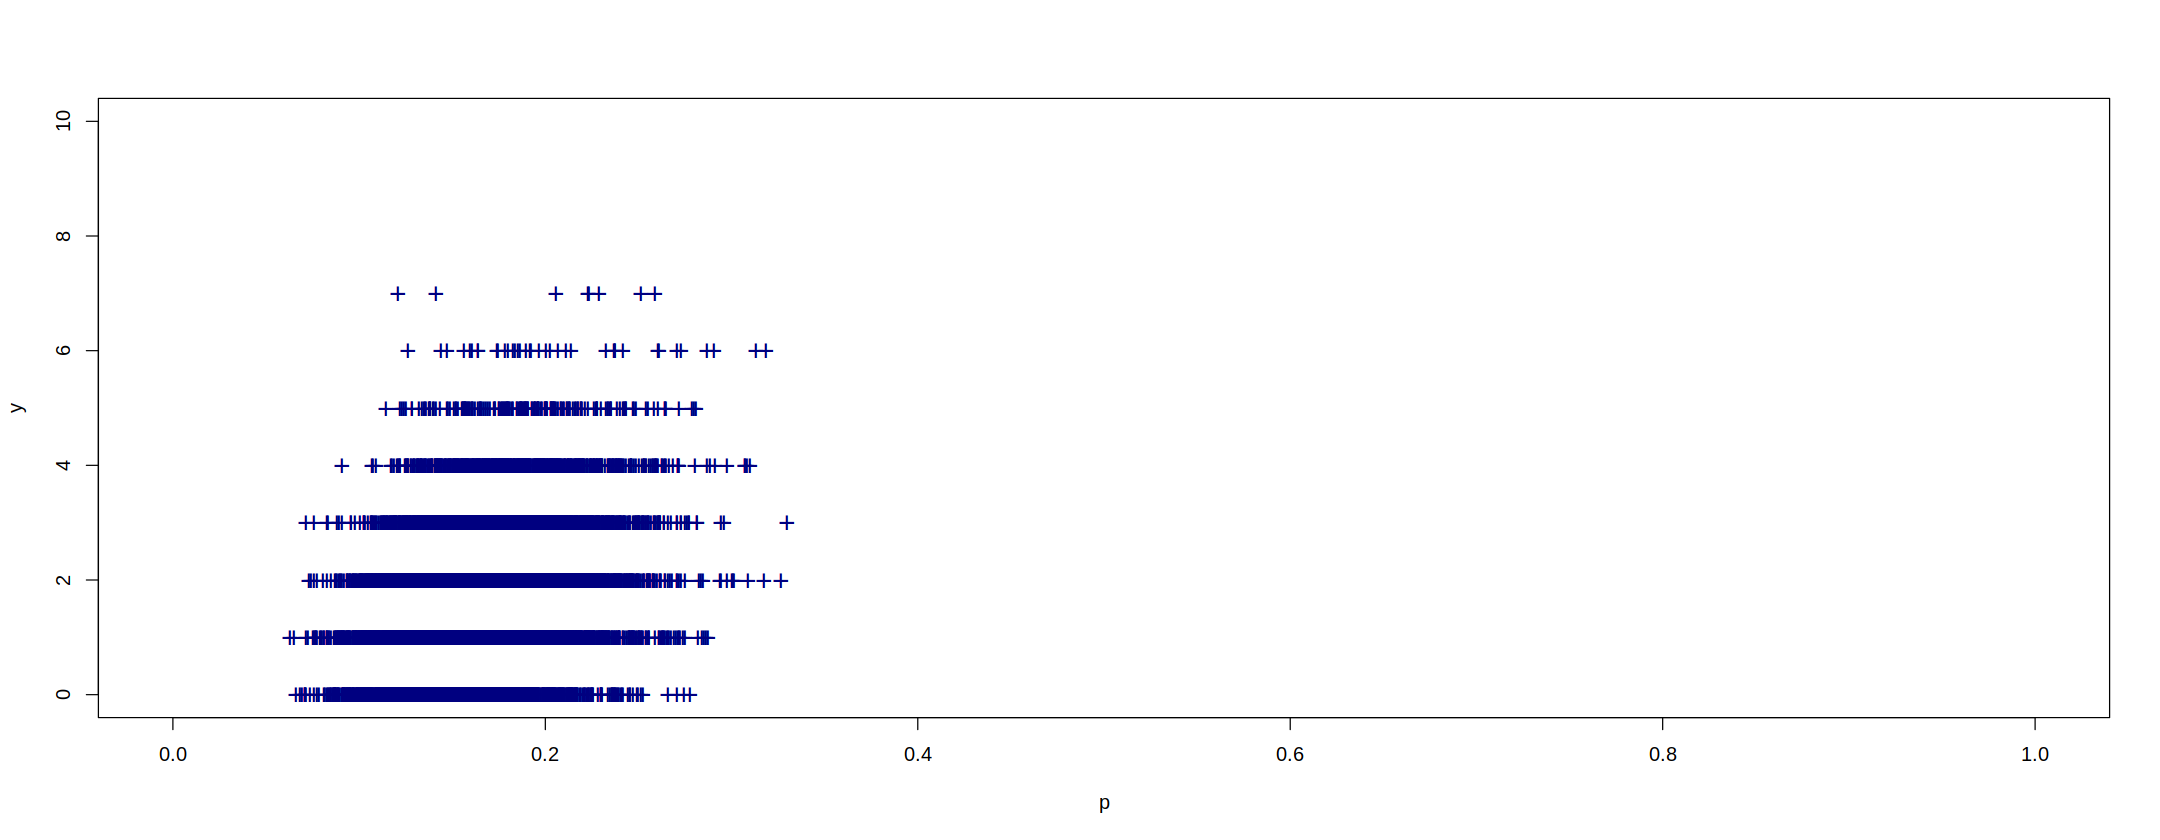

In [15]:
# Step 1 – The Observed Data
data <- c(0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1)

# Step 2: Write the BUGS model to a file
model_string <- "
model {
  # Likelihood: Each observation X[i] ~ Bernoulli(p)
  for (i in 1:length(X)) {
    X[i] ~ dbern(p)
  }

  # Prior on p: Uniform(0,1), which is Beta(1,1)
  p ~ dbeta(1, 1)

  # Prediction distribution: number of successes in n_next future trials
  y ~ dbin(p, n_next)
}
"
writeLines(model_string, con = "./others/exercise_jags.bug")

# Step 3: Prepare data for JAGS creating a named list
data <- list( X = data, n_next = 10 )   # 'X' must be the name defined in the bugs model, same for n_next

# Step 4: Create and initialize the model
jm <- jags.model("./others/exercise_jags.bug", data = data, n.chains = 1)

# Step 5: Burn-in (skip first steps)
update(jm, n.iter = 1000)

# Step 6: Sample from the posterior
chain <- coda.samples(jm, variable.names = c("p", "y"), n.iter = 10000)   # this returns the samples as a mcmc.list object

# Step 7: Summary and diagnostics
print(summary(chain))
plot(chain, col = "navy")

# Step 8: Convert to data frame for analysis
chain.df <- as.data.frame(as.mcmc(chain))

# Posterior histogram for p
hist(chain.df$p, nc = 50, prob = TRUE, col = "darkolivegreen2",
     xlab = "p", ylab = "f(p)", main = "Inference on p")

# Posterior predictive distribution for y
ty <- table(chain.df$y)
barplot(ty / sum(ty), col = "firebrick2",
        xlab = "y", ylab = "f(y)", ylim = c(0, 0.4),
        main = sprintf("Number of successes in %d future trials", data$n_next))

# Correlation between p and y
plot(chain.df$p, chain.df$y, xlab = "p", ylab = "y", main = "",
     pch = "+", col = "navy", cex = 1.5, xlim = c(0, 1), ylim = c(0, 10))

# Optional: print correlation matrix
cat("\nCorrelation matrix:\n")
print(cor(chain.df))


## STAN
Stan is a modern and powerful tool for Bayesian statistical modeling. It allows users to define probabilistic models and efficiently sample from their posterior distributions using advanced MCMC methods.

Unlike JAGS or BUGS, which typically use Gibbs sampling or Metropolis-Hastings algorithms, Stan uses Hamiltonian Monte Carlo (HMC) and its adaptive variant NUTS (No-U-Turn Sampler). These methods are more efficient in exploring high-dimensional parameter spaces, especially when the posterior distribution has complex geometry.

**To use Stan, the user writes a Stan program that represents the statistical model**. This includes defining the data, the parameters to be estimated, and the structure of the model (priors and likelihood). The program is compiled into C++, then executed along with the data to produce samples from the posterior distribution of the parameters. These samples can be used for estimation, prediction, and uncertainty quantification.

A Stan program is organized into blocks. Each block has a specific role, and all blocks are optional (though omitting key components leads to warnings). The main blocks are:

```
data {
  // variables read as known input }

parameters {
  // variables to be estimated }

model {
  // priors and likelihood }
```

Additional blocks can include:

- `functions`: for user-defined functions
- `transformed data`: for data pre-processing
- `transformed parameters`: for intermediate quantities
- `generated quantities`: for posterior predictions or summaries

As an example, consider a simple Bernoulli model. Suppose we observe binary outcomes $X_1, X_2, \dots, X_n$ and we want to infer the probability of success $p$ and predict future outcomes. The model can be written as:
$$ 
\text{likelihood:} \quad X_i \sim \text{Bernoulli}(p) , 
\quad\quad\quad
\text{prior:} \quad p \sim \text{Beta}(1, 1) 
$$

We might also be interested in predicting the number of successes in $n_{\text{next}}$ future trials:
$$ y \sim \text{Binomial}(n_{\text{next}}, p) $$


```r
# EXAMPLE of code using STAN:
library(rstan)
# it is recommended to enable parallel computation:
options(mc.cores = parallel::detectCores())
# to avoid recompilation of unchanged models:
rstan_options(auto_write = TRUE) 
```

To run the model, the user typically compiles a Stan file and provides data:

```r
fit <- sampling(
  file = "bernoulli_model.stan",
  data = data_list,
  chains = 4,        # number of chains to run
  iter = 2000,       # number of iterations per chain
  warmup = 500       # number of burn-in (initial discarded) iterations
)
```

Initial values can be passed in three ways: a single named list for all chains, a list of named lists, one for each chain, or a function that returns a list, called separately per chain.


EXAMPLE:  
Here's a simple example using Stan for a linear regression model through some simulated data.  
The goal is to fit a linear model:
$$ y_i = \alpha + \beta x_i + \epsilon_i, \quad \epsilon_i \sim N(0,\sigma) $$

[1] "____________________POSTERIOR SUMMARIES____________________"
Inference for Stan model: anon_model.
2 chains, each with iter=2000; warmup=500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=3000.

      mean se_mean   sd 2.5%  25%  50%  75% 97.5% n_eff Rhat
alpha 2.06       0 0.11 1.85 1.99 2.06 2.14  2.28  2442    1
beta  2.95       0 0.10 2.75 2.88 2.95 3.02  3.16  3199    1
sigma 1.12       0 0.08 0.97 1.06 1.11 1.17  1.29  3099    1

Samples were drawn using NUTS(diag_e) at Thu Jun  5 16:00:19 2025.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
[1] "____________________CODA FUNCTIONS____________________"



Iterations = 1:1500
Thinning interval = 1 
Number of chains = 2 
Sample size per chain = 1500 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean     SD Naive SE Time-series SE
alpha   2.065 0.1122 0.002048       0.002271
beta    2.954 0.1025 0.001872       0.001731
sigma   1.120 0.0820 0.001497       0.001465
lp__  -60.508 1.2416 0.022668       0.031410

2. Quantiles for each variable:

          2.5%     25%     50%     75%   97.5%
alpha   1.8476   1.988   2.063   2.141   2.281
beta    2.7512   2.884   2.953   3.020   3.156
sigma   0.9731   1.062   1.114   1.174   1.289
lp__  -63.7660 -61.062 -60.193 -59.606 -59.094


Potential scale reduction factors:

      Point est. Upper C.I.
alpha       1.00       1.01
beta        1.00       1.00
sigma       1.01       1.02
lp__        1.01       1.05

Multivariate psrf

1.01

alpha     beta    sigma     lp__ 
2525.784 3614.473 3133.358 1568.001

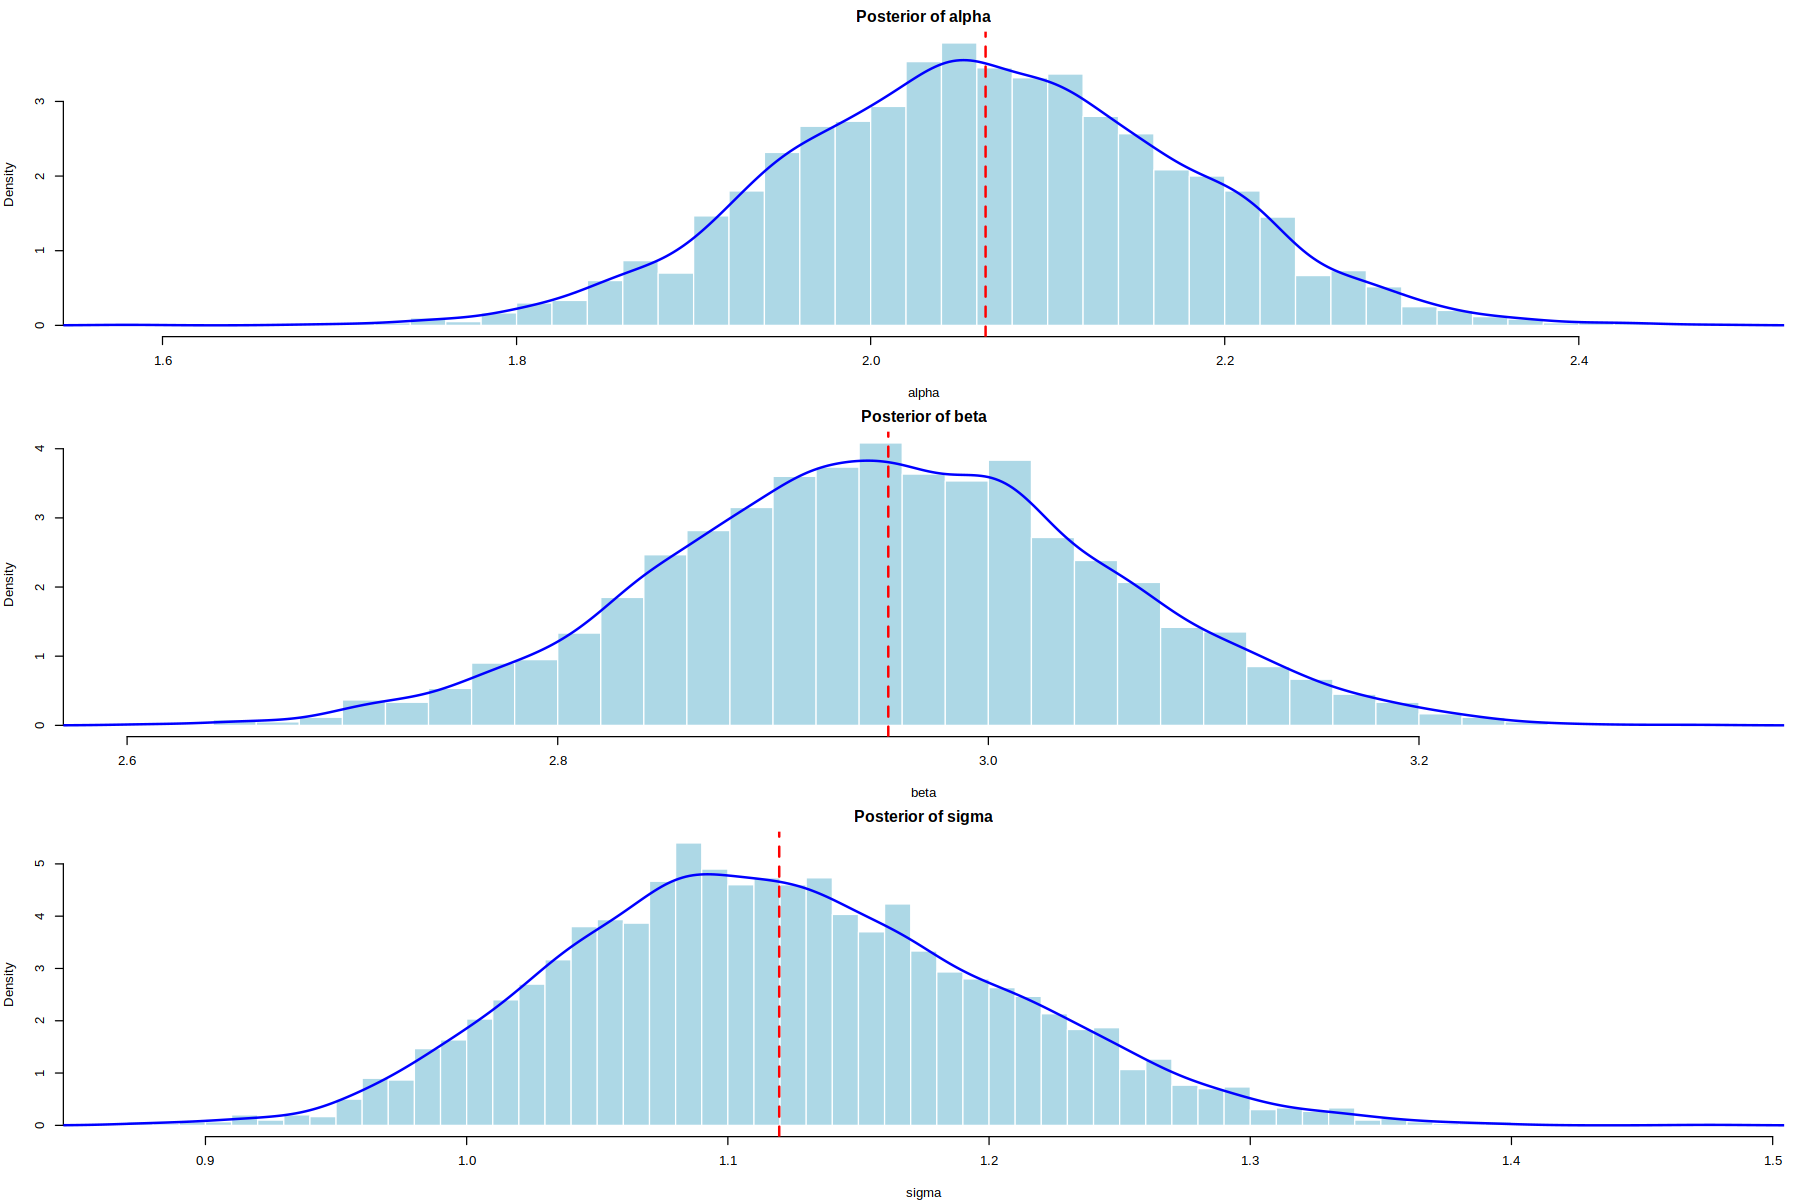

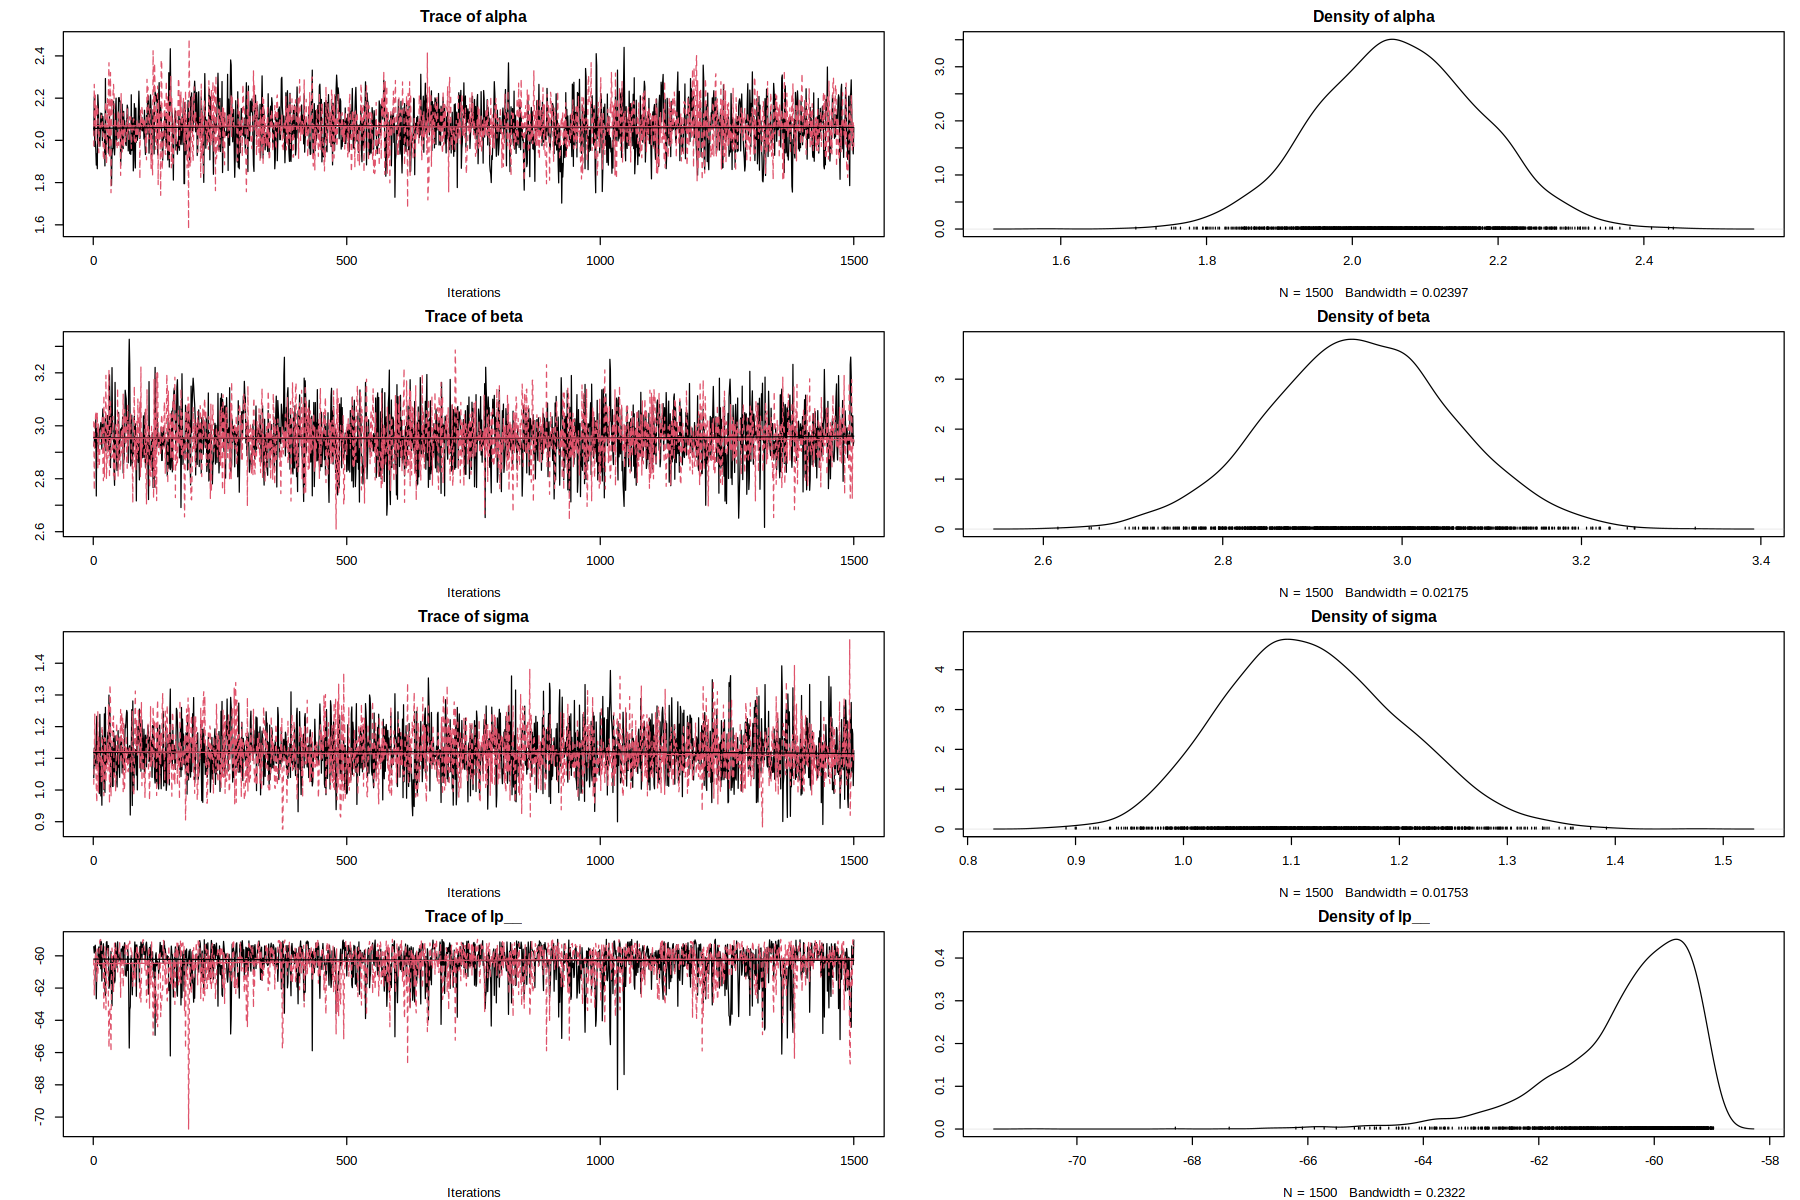

In [25]:
library(ggplot2)

# OPTIONS: Set Stan options
options(mc.cores = parallel::detectCores())
rstan_options(auto_write = TRUE)

# DATA: Simulate some linear data (with noise)
#set.seed(123)
N <- 100
x <- rnorm(N, mean = 0, sd = 1)
alpha_true <- 2
beta_true <- 3
sigma_true <- 1
y <- alpha_true + beta_true * x + rnorm(N, 0, sigma_true)
# Prepare data list for Stan:
stan_data <- list( N = N, x = x, y = y )


# MODEL: Stan model as a string
stan_code <- "
data {
  int<lower=0> N;     // Number of data points, set as a positive int value
  vector[N] x;        // Predictor (vector of length N)
  vector[N] y;        // Outcome (vector of length N)
}
parameters {          // here we have the unknown quantities we want to estimate
  real alpha;         // Intercept
  real beta;          // Slope
  real<lower=0> sigma; // Noise SD (set as positive real number)
}
model {
  y ~ normal(alpha + beta * x, sigma); // Likelihood
}"
model <- stan_model(model_code = stan_code)   # Compile the Stan model


# RUN mcmc sampling
fit <- sampling(model, data = stan_data, iter = 2000, chains = 2, warmup = 500)
print("____________________POSTERIOR SUMMARIES____________________")
print(fit, pars = c("alpha", "beta", "sigma"))       # Print posterior summaries


# EXTRACT and PLOT samples:
posterior <- extract(fit)
df_posterior <- data.frame(alpha = posterior$alpha,
                           beta = posterior$beta,
                           sigma = posterior$sigma)
# Set up plotting area: 3 rows, 1 column
options(repr.plot.width = 15, repr.plot.height = 10)
par(mfrow = c(3, 1), mar = c(4, 4, 2, 1))  # 3 rows, 1 column
for (param in names(df_posterior)) {
  values <- df_posterior[[param]]
  # Plot histogram (as density)
  hist(values, breaks = 50, freq = FALSE,
       main = paste("Posterior of", param),
       xlab = param, col = "lightblue", border = "white")
  # Add density curve
  lines(density(values), col = "blue", lwd = 2)
  # Add vertical line at posterior mean
  abline(v = mean(values), col = "red", lwd = 2, lty = 2)
}


#_______________________________________________________
# USING CODA TO ANALYZE THE CHAINS:
# Convert stanFit to array: [iteration, chain, parameter]
samples_array <- as.array(fit)

# Convert to mcmc.list, one mcmc object per chain
mcmcCoda <- mcmc.list(lapply(1:dim(samples_array)[2], function(chain) {
  mcmc(samples_array[, chain, ])
}))

# Now you can use coda functions:
print("____________________CODA FUNCTIONS____________________")
summary(mcmcCoda)
gelman.diag(mcmcCoda)
effectiveSize(mcmcCoda)
plot(mcmcCoda)  # Base R trace and density plots


### CODA
The R package `CODA` provides several functions to summarize and analyze MCMC output. It is commonly used alongside MCMC engines such as JAGS, BUGS, and even STAN (with conversion). This package can perform diagnostic checks for convergence.  
To use CODA, the MCMC output should be converted into an object of class `mcmc` through `as.mcmc`, of the `library(coda)` package. The input can be a numeric vector or a matrix where each column corresponds to a different parameter. Two particularly useful functions provided by CODA are:

- `autocorr()`: computes the auto-correlation function for each paramater of the chain at given lags. High auto-correlation values suggest slow mixing and hence slow convergence.
- `autocorr.plot()`: graphically displays the autocorrelation for each parameter.
- `effectiveSize()`: estimates the effective sample size (EES), accounting for the auto-correlation in the chain. A smaller effective size indicates that fewer independent samples have been obtained, and longer chains are needed.
- `summary()`: provides posterior means, standard deviations, quantiles, and time-series statistics.
- `traceplot()`: a plot of the sampled values of a parameter against the iteration number of the mcmc. If the trace looks like a stable "fuzzy caterpillar" with good mixing across the chains, it's a good sign. If it drifts or shows patterns, the chain might not have converged.


Iterations = 1:1e+05
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 1e+05 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
       8.63421       22.74986        0.07194        1.24614 

2. Quantiles for each variable:

    2.5%      25%      50%      75%    97.5% 
-19.4605   0.1604   8.9365  13.1389  53.0720 


var1 
333.2904

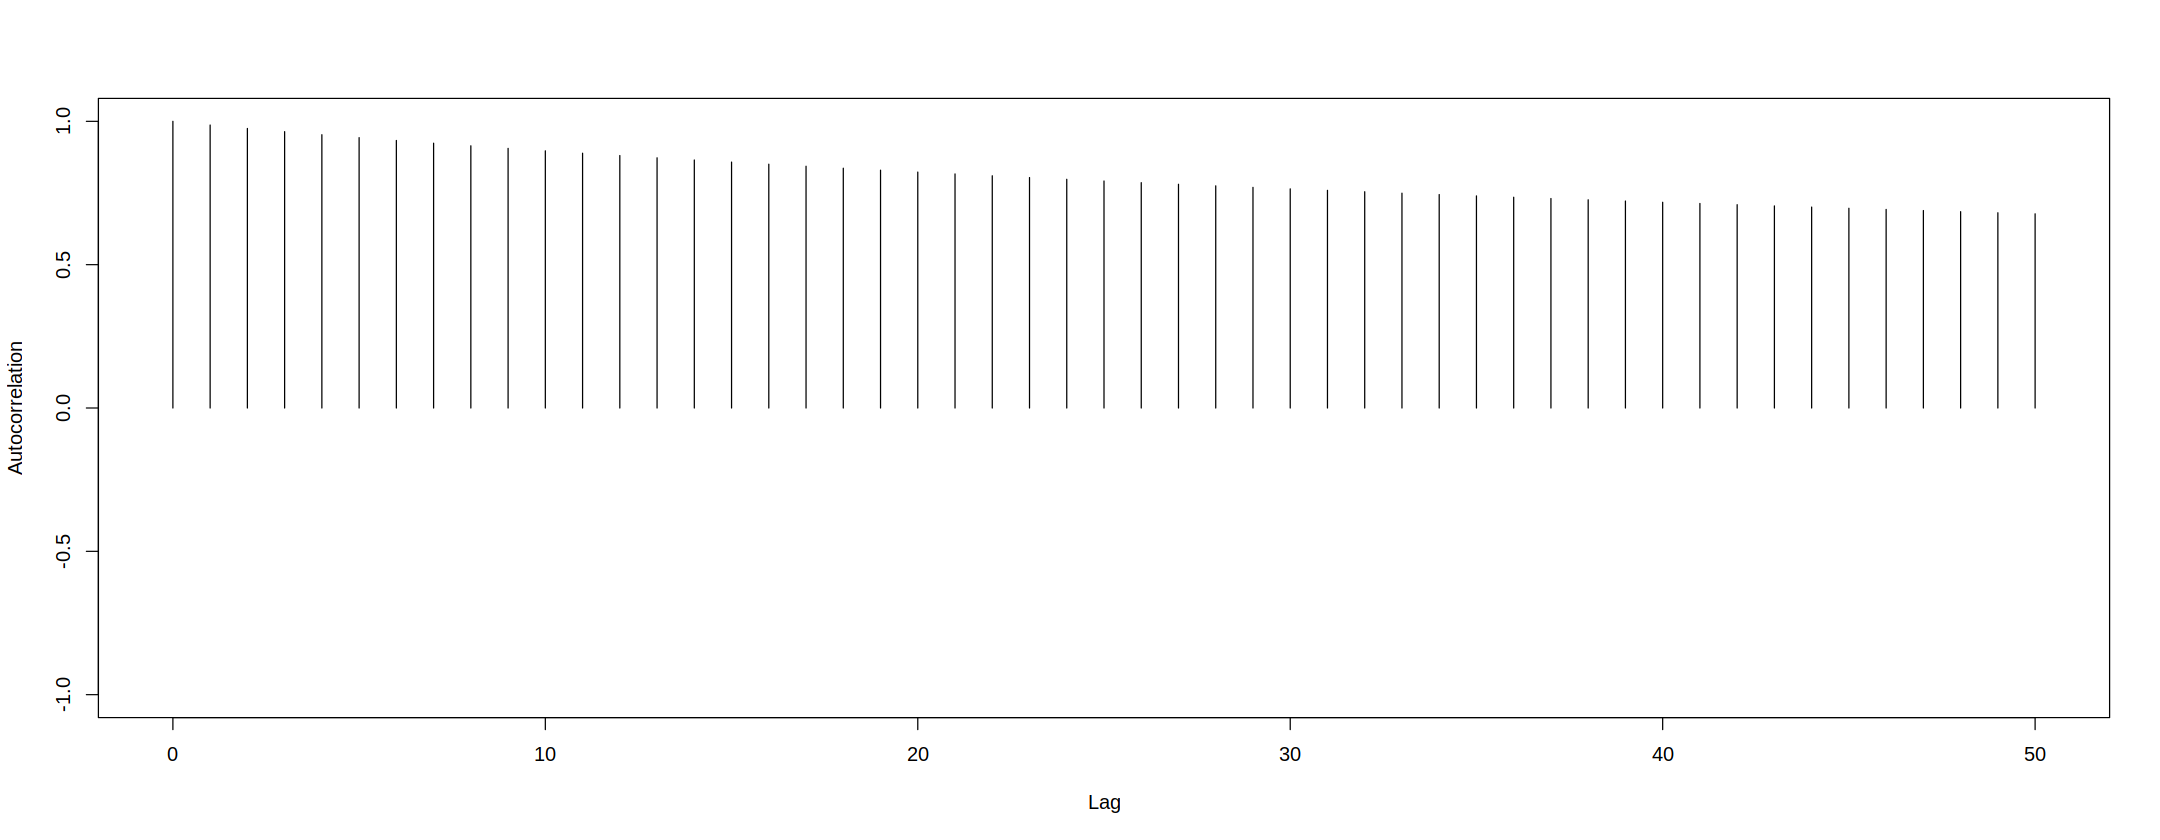

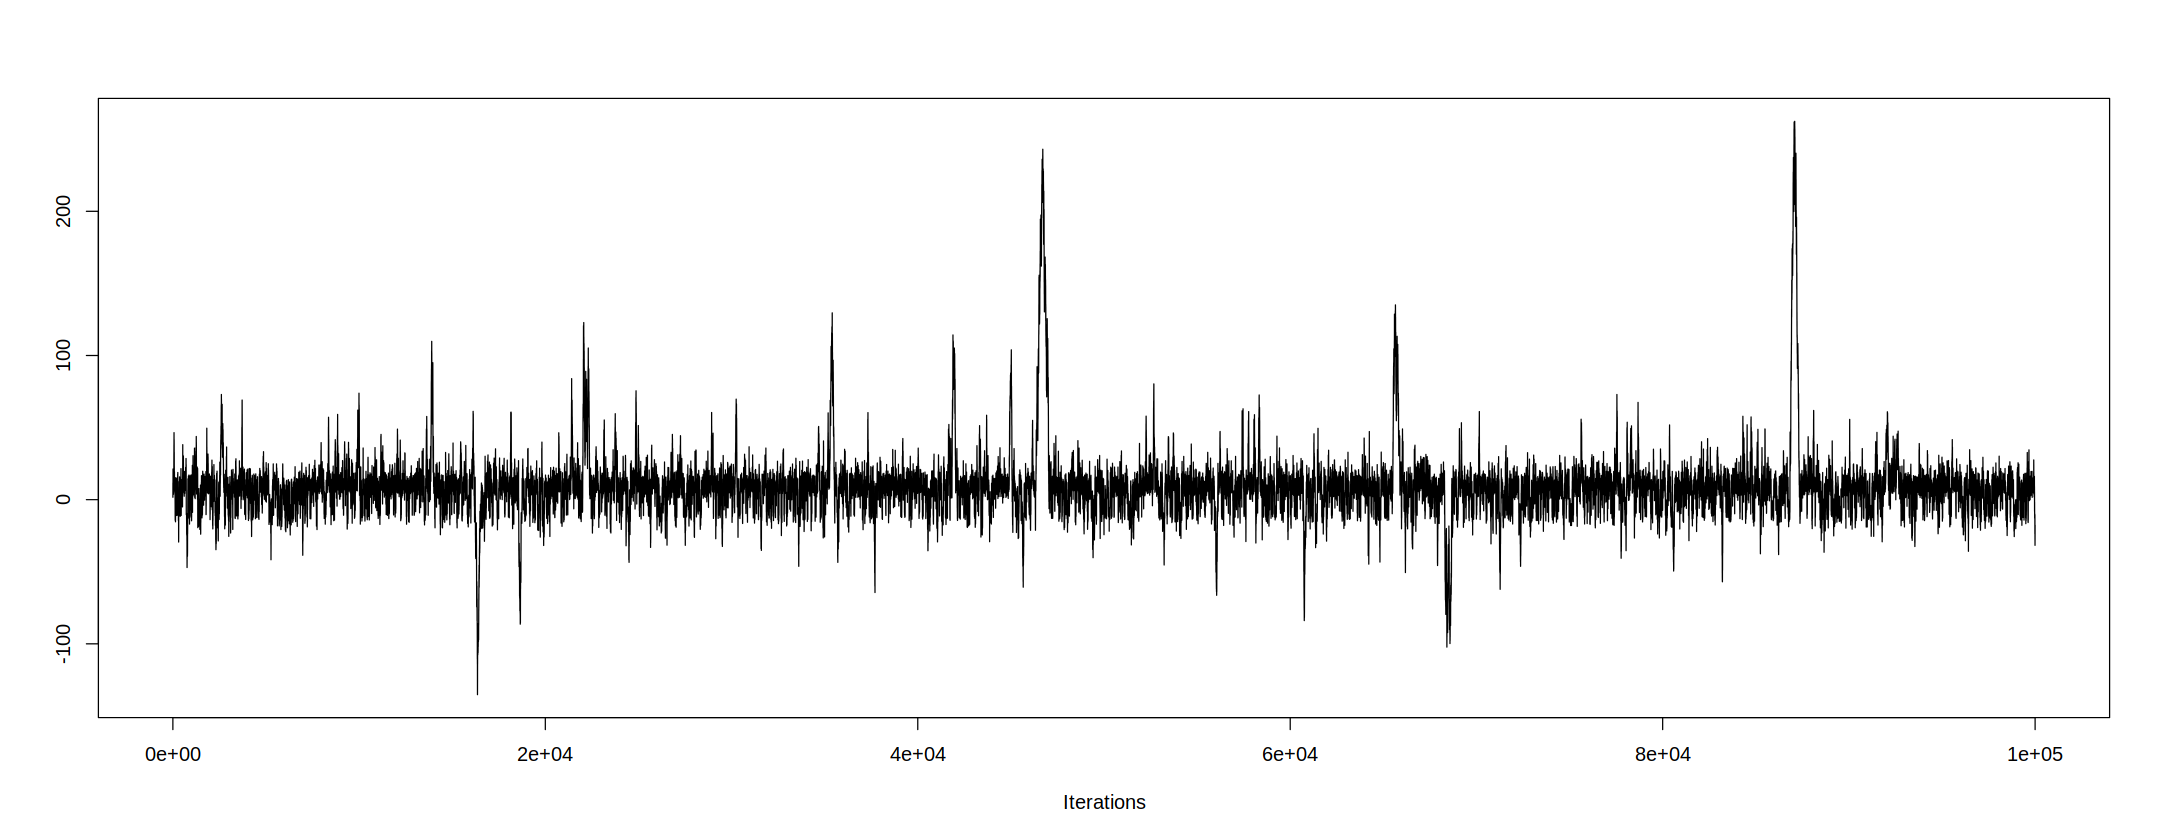

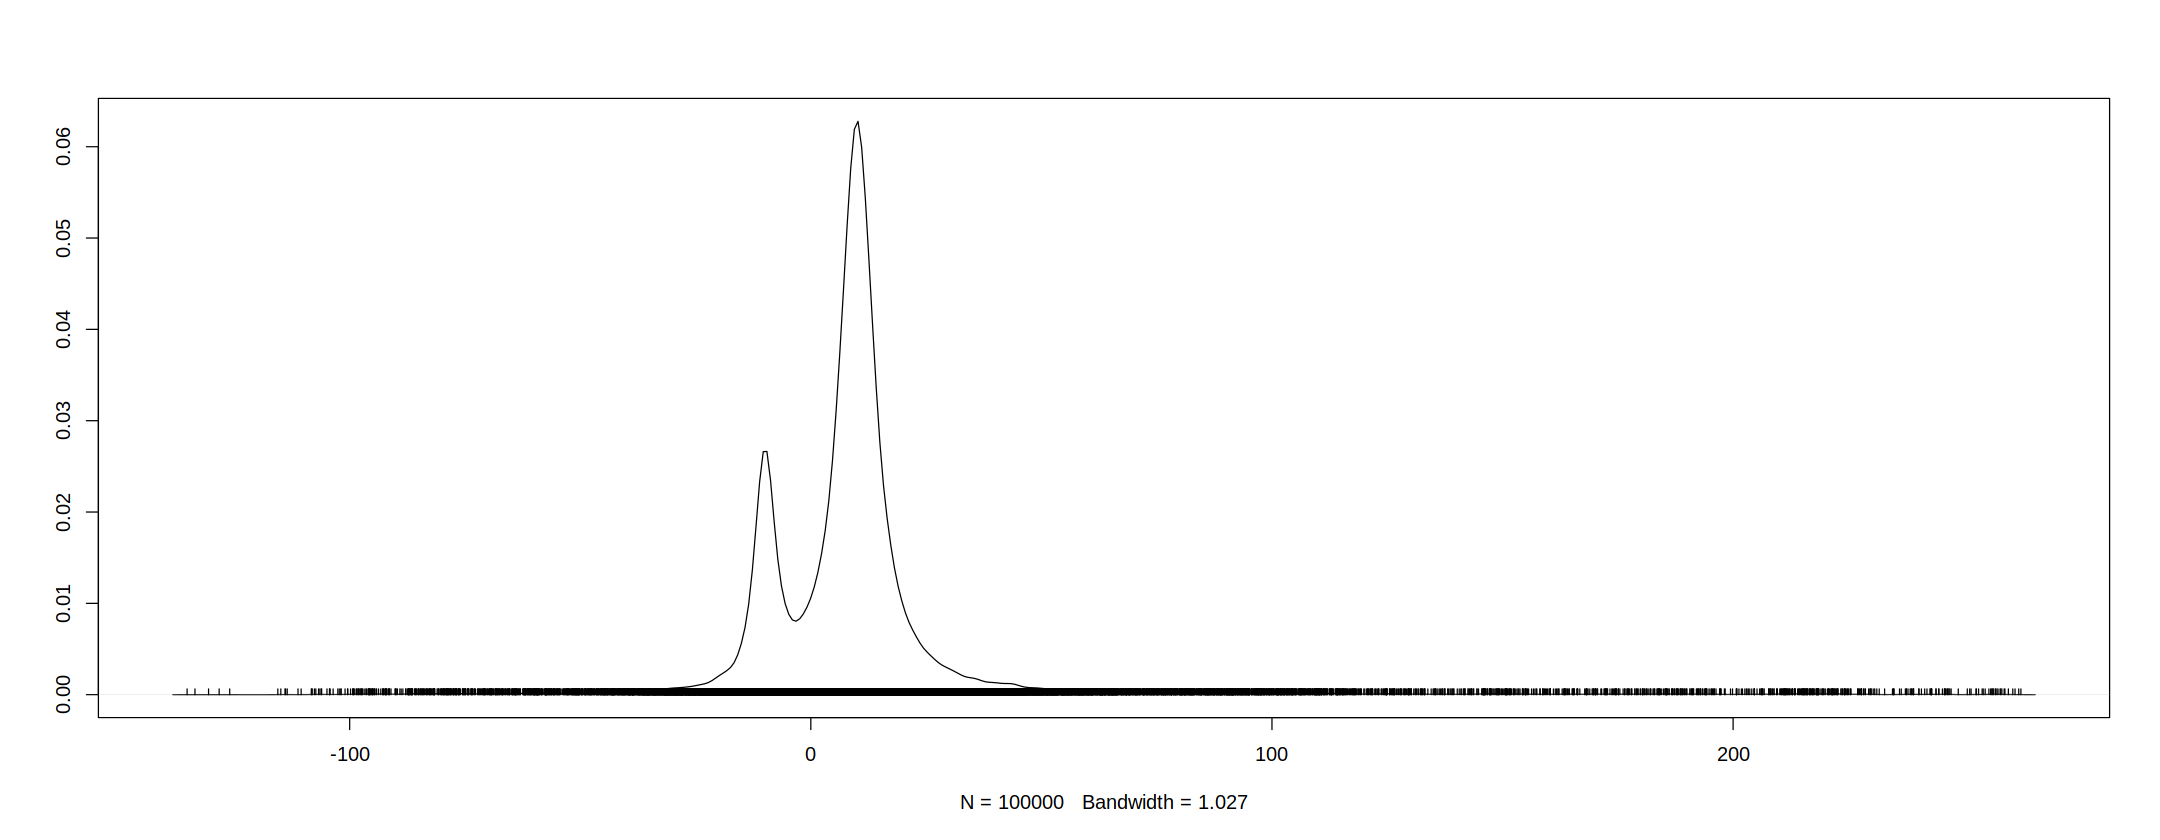

In [7]:
# EXAMPLE: let's analyze previous metropolis mcmc chain
library(coda)

mcmc_chain <- as.mcmc(samples)    # Convert mcmc output to coda's mcmc object
summary(mcmc_chain)               # Provides mean, SD, quantiles (e.g., 2.5%, 50%, 97.5%) of the chain
autocorr.plot(mcmc_chain)         # Plots autocorrelation at different lags; high values → poor mixing
effectiveSize(mcmc_chain)         # Tells you how many "independent" samples you really have
traceplot(mcmc_chain)             # Visualizes how the sample evolves — good for spotting trends or lack of mixing
densplot(mcmc_chain)              # Estimates the marginal posterior distribution of your parameter

### BRMS PACKAGE
The `brms` package provides a flexible and accessible interface to fit Bayesian generalized (non-)linear multivariate multilevel models in R. It acts as a front-end to Stan allowing users to benefit from Stan's accuracy and sampling methods without having to write Stan code directly.
